# OPTIMISATIONS DISCRÈTES

## Projet – Knapsack Problem

### Pi-15: n = 100

In [169]:
file_pi15_n100 = "pi-15-100-1000-001.kna"

def extract_data(file_path):
  with open(file_path, 'r') as f:
      content = f.readlines()
      profit = []
      weight = []
      for i in range(7, len(content)):
        profit.append(content[i].split(" ")[1])
        weight.append(content[i].split(" ")[2].split("\n")[0])
  return profit, weight

In [170]:
profits_pi15_n100, weights_pi15_n100 = extract_data(file_pi15_n100)
profits_pi15_n100 = [int(i) for i in profits_pi15_n100]
weights_pi15_n100 = [int(i) for i in weights_pi15_n100]
print(profits_pi15_n100)
print(weights_pi15_n100)

[96, 507, 417, 993, 651, 237, 459, 816, 447, 423, 792, 360, 669, 600, 9, 546, 336, 768, 996, 894, 633, 132, 429, 702, 618, 876, 720, 420, 795, 198, 999, 117, 909, 540, 708, 570, 537, 933, 726, 489, 774, 513, 81, 945, 60, 303, 765, 537, 726, 789, 480, 144, 339, 642, 198, 495, 66, 825, 210, 711, 801, 315, 291, 402, 468, 690, 834, 225, 246, 849, 114, 381, 363, 66, 486, 687, 288, 891, 24, 492, 891, 90, 183, 216, 18, 474, 420, 420, 357, 684, 306, 201, 387, 954, 501, 195, 738, 324, 993, 225]
[94, 506, 416, 992, 649, 237, 457, 815, 446, 422, 791, 359, 667, 598, 7, 544, 334, 766, 994, 893, 633, 131, 428, 700, 617, 874, 720, 419, 794, 196, 997, 116, 908, 539, 707, 569, 537, 931, 726, 487, 772, 513, 81, 943, 58, 303, 764, 536, 724, 789, 479, 142, 339, 641, 196, 494, 66, 824, 208, 711, 800, 314, 289, 401, 466, 689, 833, 225, 244, 849, 113, 379, 361, 65, 486, 686, 286, 889, 24, 491, 891, 90, 181, 214, 17, 472, 418, 419, 356, 682, 306, 201, 385, 952, 500, 194, 737, 324, 992, 224]


In [171]:
def extract_info(file_path):
  with open(file_path, 'r') as f:
      content = f.readlines()
      content_line4 = content[3].split("NB_ITEMS: ")
      nb_items = content_line4[1].split("\n")[0]
      content_line5 = content[4].split("MAX_CAPACITY: ")
      max_capacity = content_line5[1].split("\n")[0]
      max_capacity = int(max_capacity)


  return int(nb_items), int(max_capacity)

In [172]:
nb_items_pi15_n100, max_capacity_pi15_n100 = extract_info(file_pi15_n100)
print(nb_items_pi15_n100)
print(max_capacity_pi15_n100)

100
997


In [173]:
def calculate_profit(
    solution: str,
    profits: list
  ):

  profit = 0
  for i in range(len(solution)):
    if solution[i] == "1":
      profit += int(profits[i])

  return profit

In [174]:
def calculate_weight(
    solution: str,
    weights: list
  ):

  weight = 0
  for i in range(len(solution)):
    if solution[i] == "1":
      weight += int(weights[i])

  return weight

#### Création d'une solution valide (pas forcément optimale):
-->Ajouter des items aléatoirement dans le sac à dos jusqu'à arriver au poids maximal.

In [175]:
import random

def gen_valid_solution(max_capacity, weights, nb_items):
    sol = []  # Liste pour stocker la solution binaire
    current_capacity = 0

    for i in range(nb_items):
        if current_capacity >= max_capacity:
            sol.append("0")  # Si on atteint la limite, on met "0"
        else:
            bit = random.choice(["0", "1"])
            if bit == "1" and current_capacity + weights[i] > max_capacity:
                bit = "0"  # On force un "0" si ajouter 1 dépasse la capacité
            sol.append(bit)
            if bit == "1":
                current_capacity += weights[i]  # Mise à jour du poids

    return "".join(sol)


In [176]:
print("Poids à ne pas dépasser: ",max_capacity_pi15_n100)
a_solution = gen_valid_solution(max_capacity_pi15_n100, weights_pi15_n100, nb_items_pi15_n100)
print("Une solution valide est: ", a_solution)
print("Le profit de cette solution est: ", calculate_profit(a_solution, profits_pi15_n100))
print("Le poids total de cette solution est: ", calculate_weight(a_solution, weights_pi15_n100))

Poids à ne pas dépasser:  997
Une solution valide est:  1010000010000010000000000000000000000000000000000000000000000000000000000000001000000000000000000000
Le profit de cette solution est:  993
Le poids total de cette solution est:  987


#### La solution optimale avec un solver

In [177]:
!pip -q install ortools

In [221]:
from ortools.linear_solver import pywraplp
import numpy as np
import time

def solve_knapsack(profits, weights, capacity_max):

    solver = pywraplp.Solver.CreateSolver('SCIP')
    if not solver:
        print("Solveur non disponible.")
        return None, None

    n = len(profits)

    x = [solver.BoolVar(f'x_{i}') for i in range(n)]

    # Ajout de la contrainte de capacité
    solver.Add(solver.Sum(weights[i] * x[i] for i in range(n)) <= capacity_max)

    # Définition de la fonction objectif : Maximiser le profit total
    solver.Maximize(solver.Sum(profits[i] * x[i] for i in range(n)))

    # Résolution du problème
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        # Extraction de la solution optimale
        best_solution = [int(x[i].solution_value()) for i in range(n)]
        best_profit = solver.Objective().Value()
        return best_solution, best_profit
    else:
        print("Aucune solution optimale trouvée.")
        return None, None
time1 = time.time()

best_solution, best_profit = solve_knapsack(profits_pi15_n100, weights_pi15_n100, max_capacity_pi15_n100)

target_profit = best_profit
target_weight = sum(weights_pi15_n100[i] for i in range(len(best_solution)) if best_solution[i] == 1)
if best_solution:
    print("Meilleure solution trouvée :", best_solution)
    print("Meilleur profit :", target_profit)
    print("Poids atteint :", target_weight)


indice = np.where(np.array(best_solution) == 1)[0]
print(indice)
time2 = time.time()
temps_solver = []
temps_exec100 = time2 - time1
temps_solver.append(temps_exec100)
print("Temps d'exécution : ",temps_exec100 )
print(temps_solver)

Meilleure solution trouvée : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Meilleur profit : 1011.0
Poids atteint : 997
[ 0 14 29 31 51 54 73 82]
Temps d'exécution :  0.010524988174438477
[0.010524988174438477]


In [179]:
best_solution_str = "".join(map(str, best_solution))
print("Meilleure solution trouvée (string):", best_solution_str)

Meilleure solution trouvée (string): 1000000000000010000000000000010100000000000000000001001000000000000000000100000000100000000000000000


#### Métaheuristique 1 - Recuit simulé

In [180]:
#Méthode de voisinage - Transformation locale (p. 98 du cours)
def generate_single_neighbor(current_solution: str):

    """Génère un seul voisin en modifiant un bit de la solution actuelle."""

    neighbor = list(current_solution)
    index = random.randint(0, len(current_solution) - 1)
    neighbor[index] = '1' if neighbor[index] == '0' else '0'

    return ''.join(neighbor)

In [181]:
import numpy as np
import random
import matplotlib.pyplot as plt

def simulated_annealing(
    initial_solution: str,
    max_capacity: int,
    profits: list,
    weights: list,
    temperature: float,
    cooling_rate: float,
):
    current_solution = initial_solution
    current_profit = calculate_profit(current_solution, profits)
    current_weight = calculate_weight(current_solution, weights)

    best_solution = current_solution
    best_profit = current_profit

    iteration = 0

    # Listes pour stocker les valeurs à chaque itération
    profits_list = []
    weights_list = []

    while temperature > 1:
        iteration += 1

        # Générer un voisin valide (ne dépassant pas max_capacity)
        while True:
            neighbor = generate_single_neighbor(current_solution)
            neighbor_profit = calculate_profit(neighbor, profits)
            neighbor_weight = calculate_weight(neighbor, weights)

            if neighbor_weight <= max_capacity:
                break  # On garde ce voisin valide

        delta = neighbor_profit - current_profit

        if delta > 0:
            current_solution = neighbor
            current_profit = neighbor_profit
            if neighbor_profit > best_profit:
                best_solution = neighbor
                best_profit = neighbor_profit
        else:
            probability = np.exp(delta / temperature)
            if random.uniform(0, 1) < probability:
                current_solution = neighbor
                current_profit = neighbor_profit

        # Ajouter les valeurs actuelles de profit et poids dans les listes
        profits_list.append(current_profit)
        weights_list.append(current_weight)

        # Réduction progressive de la température
        temperature *= cooling_rate

    # Tracer l'évolution du profit et du poids
    plt.figure(figsize=(12, 6))

    # Tracer du profit au fil des itérations
    plt.subplot(1, 2, 1)
    plt.plot(profits_list, label='Profit', color='blue')
    plt.title('Évolution du profit au fil des itérations')
    plt.xlabel('Itérations')
    plt.ylabel('Profit')
    plt.grid(True)

    # Tracer du poids au fil des itérations
    plt.subplot(1, 2, 2)
    plt.plot(weights_list, label='Poids', color='red')
    plt.title('Évolution du poids au fil des itérations')
    plt.xlabel('Itérations')
    plt.ylabel('Poids')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return best_solution, best_profit, iteration


Poids à ne pas dépasser: 997
Solution initiale choisie aléatoirement:  1100000000000010000001000000000100000000001000000000000000000000000000000000000000001000000000000000
Son profit actuel: 960
Son poids actuel: 952



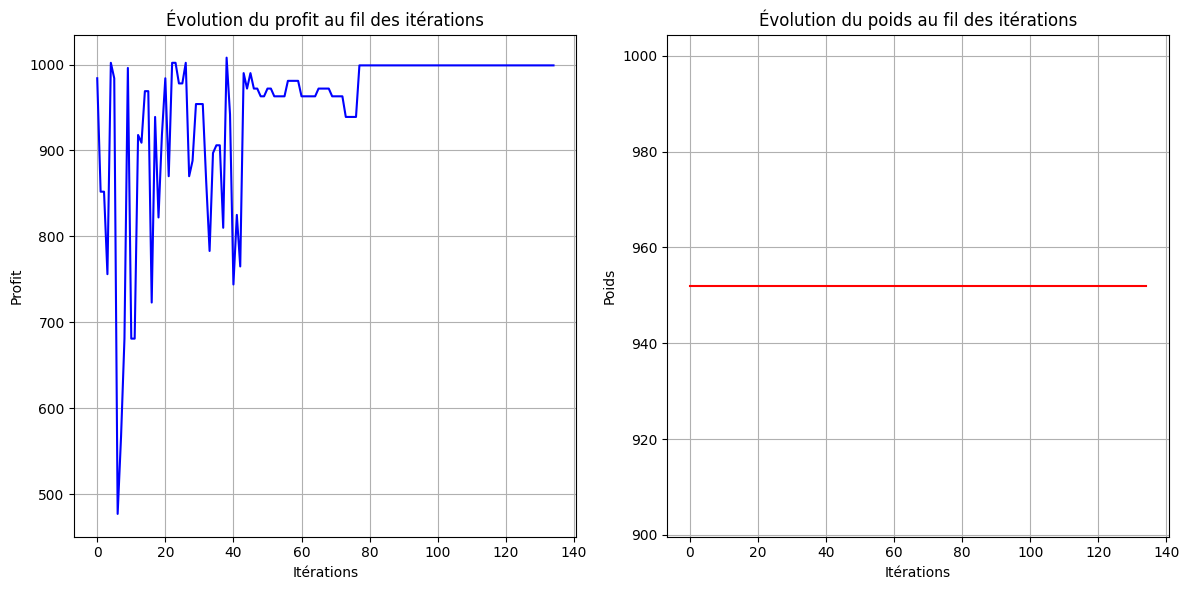

Meilleure solution trouvée : 0000010000000010000000000000000000000000000010000000001010000000000000100100001000011000000000000000
Meilleur profit : 1008
Poids atteind : 997
Solution trouvée en 135 itérations


In [182]:
# Test du recuit simulé

print("Poids à ne pas dépasser:", max_capacity_pi15_n100)
initial_solution = gen_valid_solution(max_capacity_pi15_n100, weights_pi15_n100, nb_items_pi15_n100)

print("Solution initiale choisie aléatoirement: ",initial_solution)
print("Son profit actuel:",calculate_profit(initial_solution, profits_pi15_n100))
print("Son poids actuel:",calculate_weight(initial_solution, weights_pi15_n100))
print()

temperature = 1000
cooling_rate = 0.95

best_sol, best_prof, iterations = simulated_annealing(initial_solution, max_capacity_pi15_n100, profits_pi15_n100, weights_pi15_n100, temperature, cooling_rate)
print("Meilleure solution trouvée :", best_sol)
print("Meilleur profit :", best_prof)
print("Poids atteind :", calculate_weight(best_sol, weights_pi15_n100))
print(f"Solution trouvée en {iterations} itérations")


#### Tests


In [183]:
import pandas as pd
import time

def test_recuit_simule(temperature, cooling_rate, max_capacity, profits, weights, nb_items):
    results = []

    # Générer une solution initiale valide
    initial_solution = gen_valid_solution(max_capacity, weights, nb_items)
    initial_profit = calculate_profit(initial_solution, profits)
    initial_weight = calculate_weight(initial_solution, weights)

    # Démarrer le chronomètre
    start_time = time.time()

    # Appliquer le recuit simulé
    best_solution, best_profit, iterations = simulated_annealing(
        initial_solution, max_capacity, profits, weights, temperature, cooling_rate
    )

    # Arrêter le chronomètre
    end_time = time.time()
    execution_time = end_time - start_time  # Temps en secondes

    best_weight = calculate_weight(best_solution, weights)
    nb_objects = 0
    for i in range(len(best_solution)):
      if best_solution[i] == "1":
        nb_objects += 1

    # Enregistrement des résultats
    results.append({
        "Solution initiale": initial_solution,
        "Profit initial": initial_profit,
        "Poids initial": initial_weight,
        "Temperature": temperature,
        "Cooling Rate": cooling_rate,
        "Nouvelle solution": best_solution,
        "Nouveau profit": best_profit,
        "Nouveau Poids": best_weight,
        "Nb Itérations": iterations,
        "Nb objets": nb_objects,
        "Temps (s)": execution_time
    })

    # Convertir en DataFrame pandas
    df = pd.DataFrame(results)

    return df

In [184]:
temperatures = [100, 200, 500, 700, 1000, 2000, 5000, 7000, 10000]
cooling_rates = [round(0.85 + i * 0.01, 2) for i in range(15)] # pour [0.85, 0.86, ..., 0.99]

'''for temperature in temperatures:
    for cooling_rate in cooling_rates:
        print(f"Temp {temperature}\nCooling rate {cooling_rate}")
        test = test_recuit_simule(temperature, cooling_rate, max_capacity_pi15_n100, profits_pi15_n100, weights_pi15_n100, nb_items_pi15_n100)
        test.to_csv(f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule{nb_items_pi15_n100}_15.csv", index=False)
'''

'for temperature in temperatures:\n    for cooling_rate in cooling_rates:\n        print(f"Temp {temperature}\nCooling rate {cooling_rate}")\n        test = test_recuit_simule(temperature, cooling_rate, max_capacity_pi15_n100, profits_pi15_n100, weights_pi15_n100, nb_items_pi15_n100)\n        test.to_csv(f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule{nb_items_pi15_n100}_15.csv", index=False)\n'

#### Graphiques

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_profit_from_temp(temperatures, cooling_rates):
    max_profits = {}

    for temperature in temperatures:
        max_profit = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_profit = max(max_profit, df["Nouveau profit"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_profits[temperature] = max_profit

    return max_profits


In [186]:
import pandas as pd
import os

def extract_max_profit_from_CR(temperatures, cooling_rates):
    max_profits = {}

    for cooling_rate in cooling_rates:
        max_profit = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nouveau profit"].max()
                max_profit = max(max_profit, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        max_profits[cooling_rate] = max_profit if max_profit != float('-inf') else None

    return max_profits


In [187]:
max_profits_temp = extract_max_profit_from_temp(temperatures, cooling_rates)
print(max_profits_temp)

{100: np.int64(1002), 200: np.int64(1005), 500: np.int64(1008), 700: np.int64(1005), 1000: np.int64(1008), 2000: np.int64(1008), 5000: np.int64(1008), 7000: np.int64(1008), 10000: np.int64(1005)}


In [188]:
max_profits_CR = extract_max_profit_from_CR(temperatures, cooling_rates)
print(max_profits_CR)

{0.85: np.int64(1002), 0.86: np.int64(1002), 0.87: np.int64(1005), 0.88: np.int64(1005), 0.89: np.int64(1008), 0.9: np.int64(1005), 0.91: np.int64(1008), 0.92: np.int64(1005), 0.93: np.int64(1005), 0.94: np.int64(1005), 0.95: np.int64(1005), 0.96: np.int64(1008), 0.97: np.int64(1005), 0.98: np.int64(1008), 0.99: np.int64(1008)}


In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_min_weight_from_temp(temperatures, cooling_rates):
    min_weights = {}

    for temperature in temperatures:
        min_weight = float('inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                min_weight = min(min_weight, df["Nouveau Poids"].min())
            else:
                print(f"Warning: File {file_name} not found.")

        min_weights[temperature] = min_weight

    return min_weights

In [190]:
def extract_min_weight_from_CR(temperatures, cooling_rates):
    min_weights = {}

    for cooling_rate in cooling_rates:
        min_weight = float('inf')

        for temperature in temperatures:
            filename = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_15.csv"

            if os.path.exists(filename):
                df = pd.read_csv(filename)
                min_weight = min(min_weight, df["Nouveau Poids"].min())
            else:
                print(f"Fichier manquant: {filename}")

        min_weights[cooling_rate] = min_weight

    return min_weights


In [191]:
min_weights_temp = extract_min_weight_from_temp(temperatures, cooling_rates)
print(min_weights_temp)

{100: np.int64(987), 200: np.int64(986), 500: np.int64(983), 700: np.int64(987), 1000: np.int64(988), 2000: np.int64(991), 5000: np.int64(975), 7000: np.int64(990), 10000: np.int64(989)}


In [192]:
min_weights_CR = extract_min_weight_from_CR(temperatures, cooling_rates)
print(min_weights_CR)

{0.85: np.int64(987), 0.86: np.int64(989), 0.87: np.int64(975), 0.88: np.int64(987), 0.89: np.int64(987), 0.9: np.int64(990), 0.91: np.int64(991), 0.92: np.int64(983), 0.93: np.int64(992), 0.94: np.int64(992), 0.95: np.int64(992), 0.96: np.int64(991), 0.97: np.int64(989), 0.98: np.int64(992), 0.99: np.int64(995)}


In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_min_object_from_temp(temperatures, cooling_rates):
    min_objects = {}

    for temperature in temperatures:
        min_object = float('inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                min_object = min(min_object, df["Nb objets"].min())
            else:
                print(f"Fichier manquant: {file_name}")

        min_objects[temperature] = min_object

    return min_objects

In [194]:
import pandas as pd
import os

def extract_min_object_from_CR(temperatures, cooling_rates):
    min_objects = {}

    for cooling_rate in cooling_rates:
        min_object = float('inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_min = df["Nb objets"].min()
                min_object = min(min_object, current_min)
            else:
                print(f"Fichier manquant: {file_name}")

        if min_object != float('inf'):
            min_objects[cooling_rate] = min_object
        else:
            min_objects[cooling_rate] = None

    return min_objects


In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_object_from_temp(temperatures, cooling_rates):
    max_objects = {}

    for temperature in temperatures:
        max_object = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_object = max(max_object, df["Nb objets"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_objects[temperature] = max_object

    return max_objects

In [196]:
import pandas as pd
import os

def extract_max_object_from_CR(temperatures, cooling_rates):
    max_objects = {}

    for cooling_rate in cooling_rates:
        max_object = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nb objets"].max()
                max_object = max(max_object, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_object != float('-inf'):
            max_objects[cooling_rate] = max_object
        else:
            max_objects[cooling_rate] = None

    return max_objects


In [197]:
max_objects_temp = extract_max_object_from_temp(temperatures, cooling_rates)
print(max_objects_temp)
min_objects_temp = extract_min_object_from_temp(temperatures, cooling_rates)
print(min_objects_temp)

{100: np.int64(7), 200: np.int64(8), 500: np.int64(10), 700: np.int64(8), 1000: np.int64(10), 2000: np.int64(9), 5000: np.int64(9), 7000: np.int64(10), 10000: np.int64(10)}
{100: np.int64(1), 200: np.int64(1), 500: np.int64(4), 700: np.int64(4), 1000: np.int64(4), 2000: np.int64(1), 5000: np.int64(4), 7000: np.int64(4), 10000: np.int64(5)}


In [198]:
max_objects_CR = extract_max_object_from_CR(temperatures, cooling_rates)
print(max_objects_CR)
min_objects_CR = extract_min_object_from_CR(temperatures, cooling_rates)
print(min_objects_CR)

{0.85: np.int64(6), 0.86: np.int64(8), 0.87: np.int64(7), 0.88: np.int64(7), 0.89: np.int64(10), 0.9: np.int64(9), 0.91: np.int64(8), 0.92: np.int64(8), 0.93: np.int64(8), 0.94: np.int64(10), 0.95: np.int64(8), 0.96: np.int64(10), 0.97: np.int64(10), 0.98: np.int64(10), 0.99: np.int64(9)}
{0.85: np.int64(4), 0.86: np.int64(4), 0.87: np.int64(5), 0.88: np.int64(4), 0.89: np.int64(1), 0.9: np.int64(1), 0.91: np.int64(4), 0.92: np.int64(1), 0.93: np.int64(4), 0.94: np.int64(4), 0.95: np.int64(1), 0.96: np.int64(4), 0.97: np.int64(1), 0.98: np.int64(4), 0.99: np.int64(4)}


In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_iterations_from_temp(temperatures, cooling_rates):
    max_iterations = {}

    for temperature in temperatures:
        max_iteration = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_iteration = max(max_iteration, df["Nb Itérations"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_iterations[temperature] = max_iteration

    return max_iterations

In [200]:
import pandas as pd
import os

def extract_max_iterations_from_CR(temperatures, cooling_rates):
    max_iterations = {}

    for cooling_rate in cooling_rates:
        max_iteration = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nb Itérations"].max()
                max_iteration = max(max_iteration, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_iteration != float('-inf'):
            max_iterations[cooling_rate] = max_iteration
        else:
            max_iterations[cooling_rate] = None

    return max_iterations


In [201]:
max_iterations_temp = extract_max_iterations_from_temp(temperatures, cooling_rates)
print(max_iterations_temp)

{100: np.int64(459), 200: np.int64(528), 500: np.int64(619), 700: np.int64(652), 1000: np.int64(688), 2000: np.int64(757), 5000: np.int64(848), 7000: np.int64(881), 10000: np.int64(917)}


In [202]:
max_iterations_CR = extract_max_iterations_from_CR(temperatures, cooling_rates)
print(max_iterations_CR)

{0.85: np.int64(57), 0.86: np.int64(62), 0.87: np.int64(67), 0.88: np.int64(73), 0.89: np.int64(80), 0.9: np.int64(88), 0.91: np.int64(98), 0.92: np.int64(111), 0.93: np.int64(127), 0.94: np.int64(149), 0.95: np.int64(180), 0.96: np.int64(226), 0.97: np.int64(303), 0.98: np.int64(456), 0.99: np.int64(917)}


In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_time_from_temp(temperatures, cooling_rates):
    max_times = {}

    for temperature in temperatures:
        max_time = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_time = max(max_time, df["Temps (s)"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_times[temperature] = max_time

    return max_times

In [204]:
import pandas as pd
import os

def extract_max_time_from_CR(temperatures, cooling_rates):
    max_times = {}

    for cooling_rate in cooling_rates:
        max_time = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Temps (s)"].max()
                max_time = max(max_time, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_time != float('-inf'):
            max_times[cooling_rate] = max_time
        else:
            max_times[cooling_rate] = None

    return max_times


In [205]:
max_time_temp = extract_max_time_from_temp(temperatures, cooling_rates)
print(max_time_temp)

{100: np.float64(1.1149916648864746), 200: np.float64(1.0054123401641846), 500: np.float64(0.9498095512390136), 700: np.float64(1.1937825679779053), 1000: np.float64(1.0286388397216797), 2000: np.float64(1.1412997245788574), 5000: np.float64(1.1407251358032229), 7000: np.float64(0.9525318145751952), 10000: np.float64(1.0000195503234863)}


In [206]:
max_time_CR = extract_max_time_from_CR(temperatures, cooling_rates)
print(max_time_CR)

{0.85: np.float64(0.952118158340454), 0.86: np.float64(1.0054123401641846), 0.87: np.float64(1.0995728969573977), 0.88: np.float64(0.7946317195892334), 0.89: np.float64(1.049919366836548), 0.9: np.float64(1.1407251358032229), 0.91: np.float64(0.744966983795166), 0.92: np.float64(0.9391391277313232), 0.93: np.float64(0.9985971450805664), 0.94: np.float64(0.8008666038513184), 0.95: np.float64(0.922232151031494), 0.96: np.float64(1.0560622215270996), 0.97: np.float64(1.1149916648864746), 0.98: np.float64(1.1937825679779053), 0.99: np.float64(1.119347333908081)}


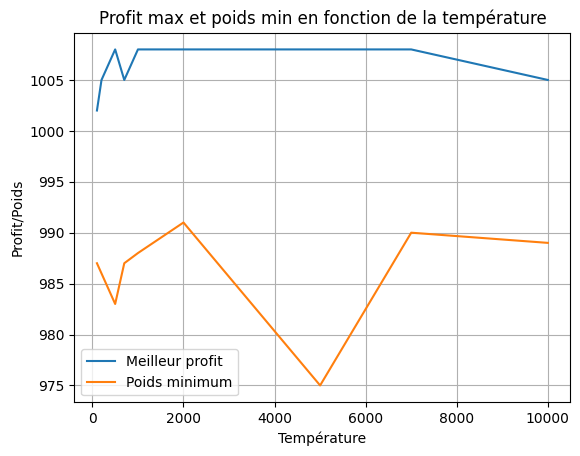

In [207]:
x = temperatures
y1 = [max_profits_temp[temp] for temp in temperatures]
y2 = [min_weights_temp[temp] for temp in temperatures]

plt.plot(x, y1, label='Meilleur profit')
plt.plot(x, y2, label='Poids minimum')
plt.xlabel('Température')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de la température')
plt.legend()
plt.grid()
plt.show()

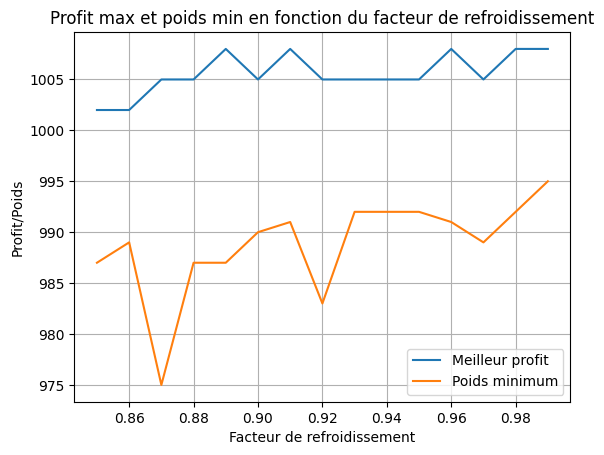

In [208]:
z = cooling_rates
z1 = [max_profits_CR[cr] for cr in cooling_rates]
z2 = [min_weights_CR[cr] for cr in cooling_rates]

plt.plot(z, z1, label='Meilleur profit')
plt.plot(z, z2, label='Poids minimum')
plt.xlabel('Facteur de refroidissement')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction du facteur de refroidissement')
plt.legend()
plt.grid()
plt.show()

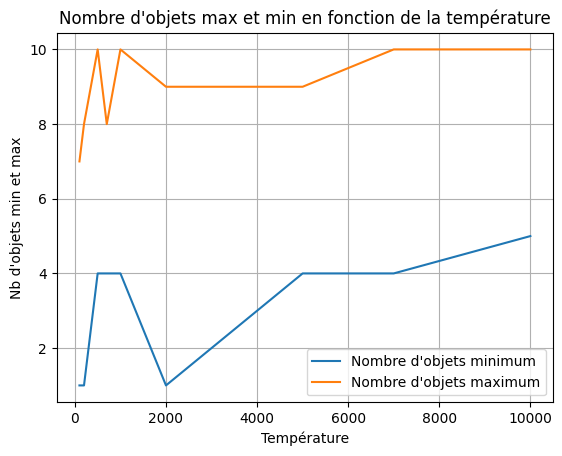

In [209]:
y3 = [min_objects_temp[temp] for temp in temperatures]
y4 = [max_objects_temp[temp] for temp in temperatures]

plt.plot(x, y3, label='Nombre d\'objets minimum')
plt.plot(x, y4, label='Nombre d\'objets maximum')
plt.title("Nombre d'objets max et min en fonction de la température")
plt.xlabel('Température')
plt.ylabel("Nb d'objets min et max")
plt.legend()
plt.grid()
plt.show()

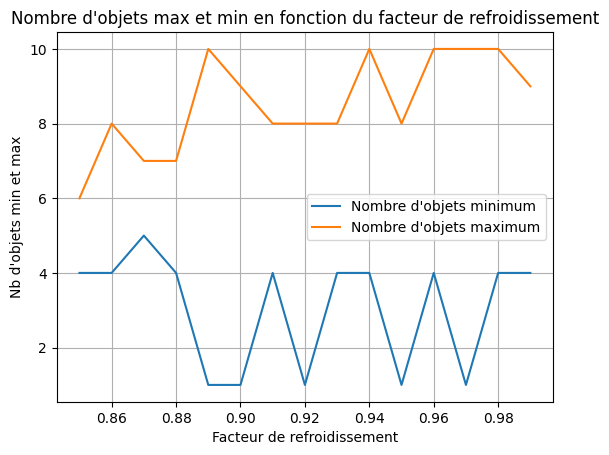

In [210]:
z3 = [min_objects_CR[cr] for cr in cooling_rates]
z4 = [max_objects_CR[cr] for cr in cooling_rates]

plt.plot(z, z3, label='Nombre d\'objets minimum')
plt.plot(z, z4, label='Nombre d\'objets maximum')
plt.title("Nombre d'objets max et min en fonction du facteur de refroidissement")
plt.xlabel('Facteur de refroidissement')
plt.ylabel("Nb d'objets min et max")
plt.legend()
plt.grid()
plt.show()

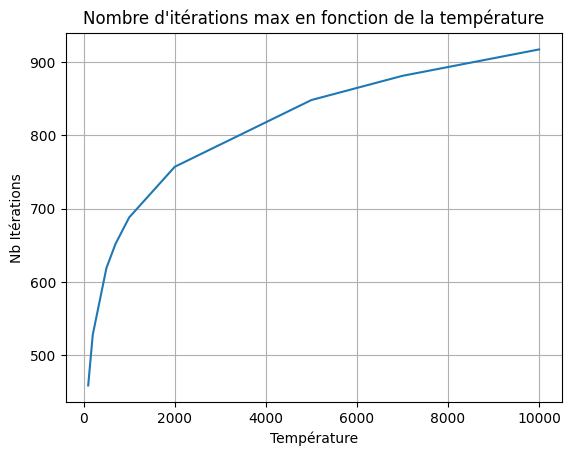

In [211]:
y5 = [max_iterations_temp[temp] for temp in temperatures]

plt.plot(x, y5, label='Nombre d\'itérations maximum')
plt.title('Nombre d\'itérations max en fonction de la température')
plt.xlabel('Température')
plt.ylabel('Nb Itérations')
plt.grid()
plt.show()

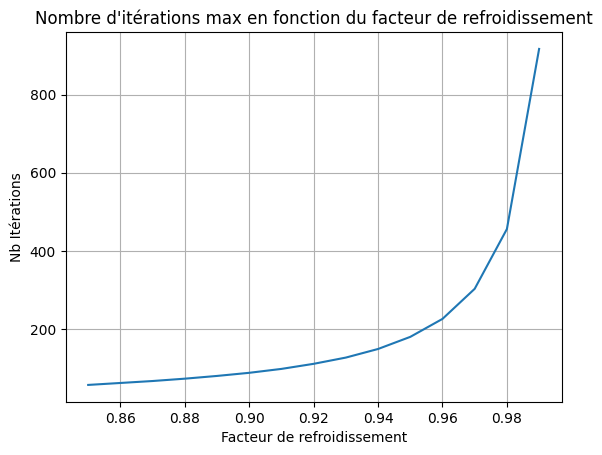

In [212]:
z5 = [max_iterations_CR[cr] for cr in cooling_rates]

plt.plot(z, z5, label='Nombre d\'itérations maximum')
plt.title('Nombre d\'itérations max en fonction du facteur de refroidissement')
plt.xlabel('Facteur de refroidissement')
plt.ylabel('Nb Itérations')
plt.grid()
plt.show()

     Température    CR  Profit max
0            100  0.85        1002
1            100  0.86        1002
2            100  0.87        1002
3            100  0.88        1002
4            100  0.89        1002
..           ...   ...         ...
130        10000  0.95        1002
131        10000  0.96        1002
132        10000  0.97        1002
133        10000  0.98        1002
134        10000  0.99        1002

[135 rows x 3 columns]
                            OLS Regression Results                            
Dep. Variable:             Profit max   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -66.00
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               1.00
Time:                        16:37:58   Log-Likelihood:                 3486.7
No. Observations:                 135   AIC:                            -6967.
Df 

c:\Users\cerik\OneDrive\Desktop\4A INFO\Projet Knapsack\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


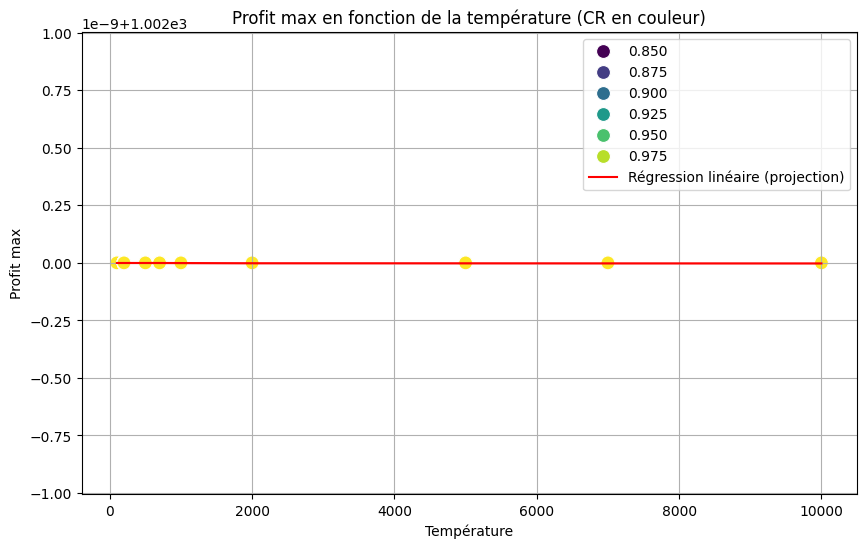

In [213]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

def collecter_donnees_recuit(temp_list, cr_list, n, fichier):
    donnees = []

    for temp in temp_list:
        for cr in cr_list:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule{n}_{fichier}.csv"
            
            if os.path.exists(file_name):
                try:
                    df = pd.read_csv(file_name)
                    if 'Nouveau profit' in df.columns:
                        profit = df['Nouveau profit'].iloc[0]
                        donnees.append({
                            "Température": temp,
                            "CR": cr,
                            "Profit max": profit
                        })
                    else:
                        print(f"'profit_final' manquant dans {file_name}")
                except Exception as e:
                    print(f"Erreur de lecture {file_name} : {e}")
            else:
                print(f"Fichier introuvable : {file_name}")

    return pd.DataFrame(donnees)

data_pi12_n100 = collecter_donnees_recuit(temperatures, cooling_rates, 100, 15)
print(data_pi12_n100)

def tracer_regression_lineaire(df):
    X = df[["Température", "CR"]]
    y = df["Profit max"]

    X = sm.add_constant(X)

    # Régression linéaire
    model = sm.OLS(y, X).fit()
    print(model.summary())

    # Extraction des coefficients
    a = model.params["Température"]
    b = model.params["CR"]
    c = model.params["const"]

    print(f"L'équation de régression linéaire est : Profit max = {a:.4f} * Température + {b:.4f} * CR + {c:.4f}")

    y_pred = model.predict(X)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x="Température", y="Profit max", hue="CR", palette="viridis", s=100)
    sns.lineplot(x=df["Température"], y=y_pred, color="red", label="Régression linéaire (projection)")
    plt.title("Profit max en fonction de la température (CR en couleur)")
    plt.legend()
    plt.grid()
    plt.show()

tracer_regression_lineaire(data_pi12_n100)


In [214]:
import os
import pandas as pd

def find_optimal_solution(temperatures, cooling_rates, optimal_solution):
    filenames = []
    for temp in temperatures:
        for cr in cooling_rates:
            filename = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_15.csv"
            if os.path.exists(filename):
                try:
                    df = pd.read_csv(filename)
                    if "Nouvelle solution" in df.columns:
                        if optimal_solution in df["Nouvelle solution"].values:
                            filenames.append(filename)
                except pd.errors.ParserError:
                    print(f"Warning: Could not parse file {filename}. Skipping.")
    return filenames

In [215]:
def find_files_with_profit_and_weight(target_profit, target_weight, dossier="Resultats"):
    filenames = []
    for filename in os.listdir(dossier):
        if filename.startswith("Temp") and filename.endswith("100_15.csv"):
            full_path = os.path.join(dossier, filename)
            try:
                df = pd.read_csv(full_path)
                if 'Nouveau profit' in df.columns and 'Nouveau Poids' in df.columns:
                    match = (df['Nouveau profit'] == target_profit) & (df['Nouveau Poids'] == target_weight)
                    if any(match):
                        filenames.append(filename)
            except pd.errors.ParserError:
                print(f"Fichier {filename} non retrouve.")
    return filenames


In [216]:
fichier_optimal = find_optimal_solution(temperatures, cooling_rates, best_solution_str)

if len(fichier_optimal) == 0:
    print("Le recuit simulé n'a pas abouti à la solution optimale en termes de choix/répartition d'objets.")
else:
    for f in fichier_optimal:
        print(f)

Le recuit simulé n'a pas abouti à la solution optimale en termes de choix/répartition d'objets.


A éxecuter uniquement si le recuit simulé a pu donner la solution optimale 

In [217]:
found_files = find_files_with_profit_and_weight(target_profit, target_weight)
for f in found_files:
  print(f)

In [218]:
def analyze_files(found_files):
    temp_counts = {}
    cr_counts = {}

    for file in found_files:
        try:
            df = pd.read_csv(file)

            # Extract temperature and cooling rate from the filename
            parts = file.split("_")
            temp_str = parts[0].split("Temp")[1]
            cr_str = parts[1].split("CR")[1].split("resultats")[0]

            temperature = int(temp_str)
            cooling_rate = float(cr_str)

            temp_counts[temperature] = temp_counts.get(temperature, 0) + 1
            cr_counts[cooling_rate] = cr_counts.get(cooling_rate, 0) + 1

        except FileNotFoundError:
            print(f"File not found: {file}")
        except (pd.errors.EmptyDataError, pd.errors.ParserError):
            print(f"Error reading file or empty file: {file}")
        except Exception as e:
            print(f"An unexpected error occurred with file {file}: {e}")


    return temp_counts, cr_counts

In [219]:
temp_dict, cr_dict = analyze_files(found_files)

print("Temperature counts:", temp_dict)
print("Cooling rate counts:", cr_dict)

max_temps = max(temp_dict, key=temp_dict.get)
print("La température optimale est:", max_temps)
max_crs = max(cr_dict, key=cr_dict.get)
print("Le facteur de refroidissement optimal est:", max_crs)

Temperature counts: {}
Cooling rate counts: {}


ValueError: max() arg is an empty sequence

#### Métaheuristique 2 - Génétique

In [ ]:
def roulette_selection(population, profits):
    # Calcul du profit total pour la population
    fitness = [calculate_profit(sol, profits) for sol in population]
    total_fitness = sum(fitness)

    # Si la fitness totale est 0, on retourne un choix aléatoire
    if total_fitness == 0:
        return random.choice(population)

    # Sélection d'un parent par roulette
    pick = random.uniform(0, total_fitness)
    current = 0
    for i, sol in enumerate(population):
        current += fitness[i]
        if current > pick:
            return sol
    return population[-1]  # Retourne le dernier si aucune sélection avant


In [ ]:
def crossover(nb_items, parent1, parent2, max_capacity, weights):
    point = random.randint(1, nb_items - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]

    # Vérification si les enfants sont valides
    if calculate_weight(child1, weights) > max_capacity:
        child1 = parent1  # Si l'enfant dépasse la capacité, on garde le parent
    if calculate_weight(child2, weights) > max_capacity:
        child2 = parent2  # Idem pour l'autre enfant

    return child1, child2


In [ ]:
def mutate(nb_items, max_capacity, weights, solution):
    sol_list = list(solution)
    index = random.randint(0, nb_items - 1)
    sol_list[index] = "1" if sol_list[index] == "0" else "0"

    # Vérification de la validité après mutation
    new_sol = "".join(sol_list)
    if calculate_weight(new_sol, weights) <= max_capacity:
        return new_sol  # Retourner la solution si elle respecte la capacité
    return solution  # Si la mutation rend la solution invalide, on garde l'ancienne solution


In [ ]:
import matplotlib.pyplot as plt

def algo_genetique(
      nb_items: int,
      max_capacity: int,
      weights: list,
      profits: list,
      nbPop: int,
      nbGen: int,
      probaCross: float,
      nbBest: int
    ):

    # Initialisation de la population
    population = [gen_valid_solution(max_capacity, weights, nb_items) for _ in range(nbPop)]
    best_solution = max(population, key=lambda sol: calculate_profit(sol, profits))
    best_profit = calculate_profit(best_solution, profits)

    # Pour le graphique
    evolution_profits = []
    evolution_weights = []

    for generation in range(nbGen):
        new_population = []

        # Sélection et reproduction
        for _ in range(nbPop):
            parent1 = roulette_selection(population, profits)
            parent2 = roulette_selection(population, profits)

            # Croisement ou mutation
            if random.random() < probaCross:
                child1, child2 = crossover(nb_items, parent1, parent2, max_capacity, weights)
            else:
                child1 = mutate(nb_items, max_capacity, weights, parent1)
                child2 = mutate(nb_items, max_capacity, weights, parent2)

            new_population.append(child1)
            new_population.append(child2)

        # Garder les meilleures solutions
        population = sorted(new_population, key=lambda sol: calculate_profit(sol, profits), reverse=True)[:nbPop]

        # Meilleure solution actuelle
        current_best_solution = population[0]
        current_best_profit = calculate_profit(current_best_solution, profits)
        current_best_weight = calculate_weight(current_best_solution, weights)

        # Enregistrer l’évolution
        evolution_profits.append(current_best_profit)
        evolution_weights.append(current_best_weight)

        # Mettre à jour la meilleure globale
        if current_best_profit > best_profit:
            best_solution = current_best_solution
            best_profit = current_best_profit

    # Tracer l'évolution du profit et du poids
    '''plt.figure(figsize=(12, 6))

    # Tracer du profit au fil des itérations
    plt.subplot(1, 2, 1)
    plt.plot(evolution_profits, label='Profit', color='blue')
    plt.title('Évolution du profit au fil des itérations')
    plt.xlabel('Itérations')
    plt.ylabel('Profit')
    plt.grid(True)

    # Tracer du poids au fil des itérations
    plt.subplot(1, 2, 2)
    plt.plot(evolution_weights, label='Poids', color='red')
    plt.title('Évolution du poids au fil des itérations')
    plt.xlabel('Itérations')
    plt.ylabel('Poids')
    plt.grid(True)

    plt.tight_layout()
    plt.show()'''

    return best_solution, best_profit


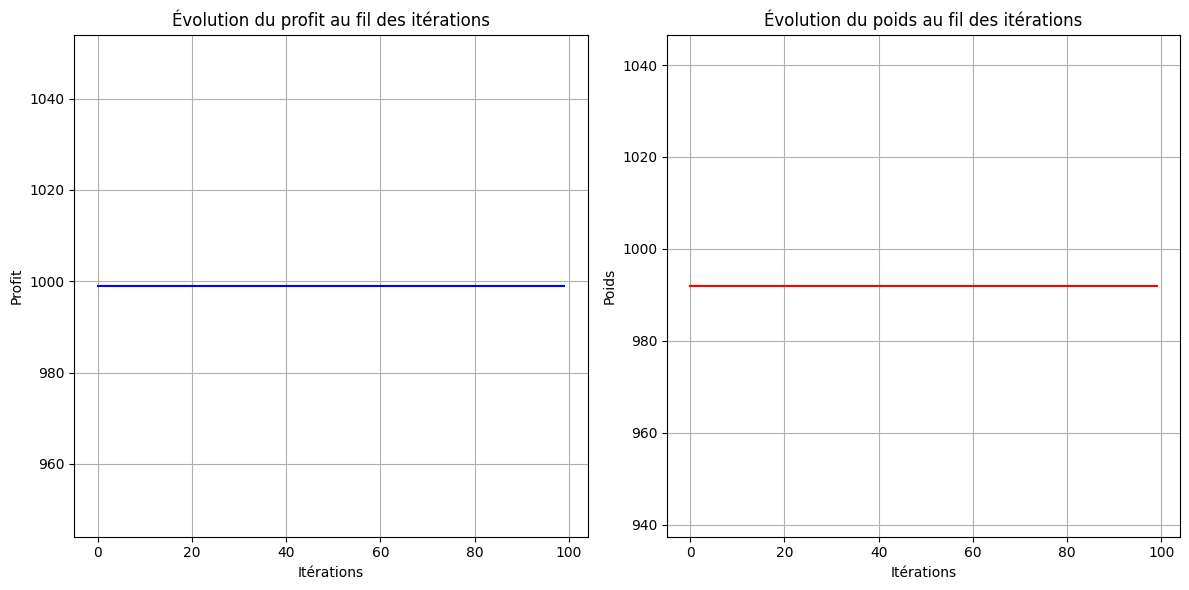

Meilleure solution trouvée : 0010001000000000000000000000000000000000000010000000000000000000000000000100000000000000000000000000
Meilleur profit : 1002
Poids atteind : 996


In [ ]:
nbPop = 10  # Taille de la population
nbGen = 100  # Nombre de générations
probaCross = 0.7  # Probabilité de croisement
nbBest = 2  # Nombre de meilleures solutions conservées

best_solution, best_profit = algo_genetique(nb_items_pi15_n100, max_capacity_pi15_n100, weights_pi15_n100, profits_pi15_n100, nbPop, nbGen, probaCross, nbBest)
print("Meilleure solution trouvée :", best_solution)
print("Meilleur profit :", best_profit)
print("Poids atteind :", calculate_weight(best_solution, weights_pi15_n100))

#### Tests

In [ ]:
import pandas as pd
import time
import os

def test_algo_genetique(nb_items, max_capacity, weights, profits, nbPop, nbGen, probaCross, nbBest):
                    results = []
                    
                    # Générer une solution initiale valide
                    initial_solution = gen_valid_solution(max_capacity, weights, nb_items)
                    initial_profit = calculate_profit(initial_solution, profits)
                    initial_weight = calculate_weight(initial_solution, weights)

                    # Démarrer le chronomètre
                    start_time = time.time()

                    # Exécuter l'algorithme génétique
                    best_solution, best_profit = algo_genetique(
                        nb_items, max_capacity, weights, profits, nbPop, nbGen, probaCross, nbBest
                    )

                    # Arrêter le chronomètre
                    end_time = time.time()
                    execution_time = end_time - start_time  # Temps en secondes

                    # Calculer le poids et le nombre d'objets de la meilleure solution
                    best_weight = calculate_weight(best_solution, weights)
                    nb_objects = sum(1 for i in range(len(best_solution)) if best_solution[i] == "1")

                    # Enregistrement des résultats
                    results.append({
                        "Solution initiale": initial_solution,
                        "Profit initial": initial_profit,
                        "Poids initial": initial_weight,
                        "NbPop": nbPop,
                        "NbGen": nbGen,
                        "ProbaCross": probaCross,
                        "NbBest": nbBest,
                        "Nouvelle solution": best_solution,
                        "Nouveau profit": best_profit,
                        "Nouveau Poids": best_weight,
                        "Nb objets": nb_objects,
                        "Temps (s)": execution_time
                    })

                    # Convertir en DataFrame et sauvegarder le fichier
                    df = pd.DataFrame(results)
                    return df
                


In [ ]:
# Fixer un interval pour les paramètres

nbPop_list = [10, 50, 70, 100]
nbGen_list = [10, 50, 70, 100]
probaCross_list = [0.1, 0.5, 0.9]
nbBest_list = [2, 5]

'''for nbPop in nbPop_list:
    for nbGen in nbGen_list:
        for probaCross in probaCross_list:
            for nbBest in nbBest_list:
                print(f"NbPop {nbPop}\nNbGen {nbGen}\nProbaCross {probaCross}\nNbBest {nbBest}")
                test = test_algo_genetique(nb_items_pi15_n100, max_capacity_pi15_n100, weights_pi15_n100, profits_pi15_n100, nbPop, nbGen, probaCross, nbBest)
                test.to_csv(f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100_15.csv", index=False)
'''

'for nbPop in nbPop_list:\n    for nbGen in nbGen_list:\n        for probaCross in probaCross_list:\n            for nbBest in nbBest_list:\n                print(f"NbPop {nbPop}\nNbGen {nbGen}\nProbaCross {probaCross}\nNbBest {nbBest}")\n                test = test_algo_genetique(nb_items_pi15_n100, max_capacity_pi15_n100, weights_pi15_n100, profits_pi15_n100, nbPop, nbGen, probaCross, nbBest)\n                test.to_csv(f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100_15.csv", index=False)\n'

In [ ]:
def extract_max_profit_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for probaCross in probaCross_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100_15.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[probaCross] = max_profit

    return max_profits

In [ ]:
def extract_min_weight_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for probaCross in probaCross_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100_15.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[probaCross] = min_weight

    return min_weights


In [ ]:
max_profits_probaCross = extract_max_profit_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_probaCross)

{0.1: np.int64(1005), 0.5: np.int64(1008), 0.9: np.int64(1008)}


In [ ]:
min_weights_probaCross = extract_min_weight_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_probaCross)

{0.1: np.int64(992), 0.5: np.int64(987), 0.9: np.int64(992)}


In [ ]:
def extract_max_profit_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbGen in nbGen_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100_15.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbGen] = max_profit

    return max_profits


In [ ]:
def extract_min_weight_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbGen in nbGen_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100_15.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbGen] = min_weight

    return min_weights

In [ ]:
max_profits_nbGen = extract_max_profit_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_nbGen)

{10: np.int64(1005), 50: np.int64(1008), 70: np.int64(1008), 100: np.int64(1005)}


In [ ]:
min_weights_nbGen = extract_min_weight_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_nbGen)

{10: np.int64(987), 50: np.int64(995), 70: np.int64(992), 100: np.int64(994)}


In [ ]:
def extract_max_profit_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbBest in nbBest_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for probaCross in probaCross_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100_15.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbBest] = max_profit

    return max_profits

In [ ]:
def extract_min_weight_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbBest in nbBest_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for probaCross in probaCross_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100_15.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbBest] = min_weight

    return min_weights

In [ ]:
max_profits_nbBest = extract_max_profit_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_nbBest)

{2: np.int64(1008), 5: np.int64(1005)}


In [ ]:
min_weights_nbBest = extract_min_weight_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_nbBest)

{2: np.int64(987), 5: np.int64(993)}


In [ ]:
def extract_max_profit_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbPop in nbPop_list:
        max_profit = float('-inf')

        for nbGen in nbGen_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100_15.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbPop] = max_profit

    return max_profits

In [ ]:
def extract_min_weight_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbPop in nbPop_list:
        min_weight = float('inf')

        for nbGen in nbGen_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100_15.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbPop] = min_weight

    return min_weights

In [ ]:
max_profits_nbPop = extract_max_profit_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_nbPop)

{10: np.int64(1005), 50: np.int64(1005), 70: np.int64(1005), 100: np.int64(1008)}


In [ ]:
min_weights_nbPop = extract_min_weight_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_nbPop)

{10: np.int64(987), 50: np.int64(992), 70: np.int64(996), 100: np.int64(994)}


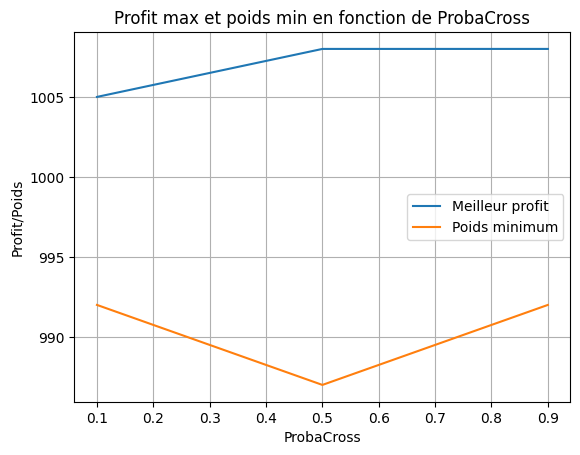

In [ ]:
y = probaCross_list
y1 = [max_profits_probaCross[i] for i in y]
y2 = [min_weights_probaCross[i] for i in y]

plt.plot(y, y1, label='Meilleur profit')
plt.plot(y, y2, label='Poids minimum')
plt.xlabel('ProbaCross')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de ProbaCross')
plt.legend()
plt.grid()
plt.show()

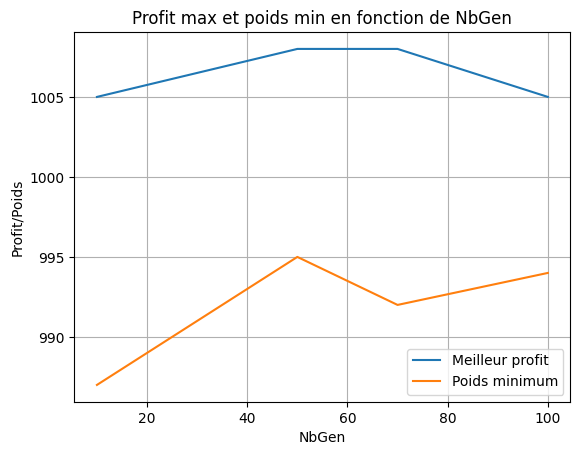

In [ ]:
z = nbGen_list
z1 = [max_profits_nbGen[i] for i in z]
z2 = [min_weights_nbGen[i] for i in z]

plt.plot(z, z1, label='Meilleur profit')
plt.plot(z, z2, label='Poids minimum')
plt.xlabel('NbGen')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de NbGen')
plt.legend()
plt.grid()
plt.show()

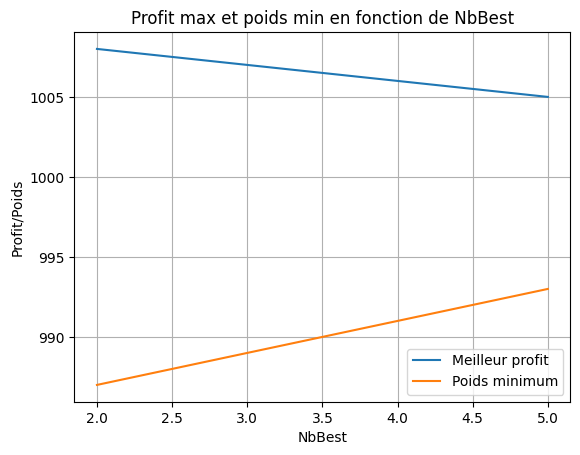

In [ ]:
k = nbBest_list
k1 = [max_profits_nbBest[i] for i in k]
k2 = [min_weights_nbBest[i] for i in k]

plt.plot(k, k1, label='Meilleur profit')
plt.plot(k, k2, label='Poids minimum')
plt.xlabel('NbBest')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de NbBest')
plt.legend()
plt.grid()
plt.show()

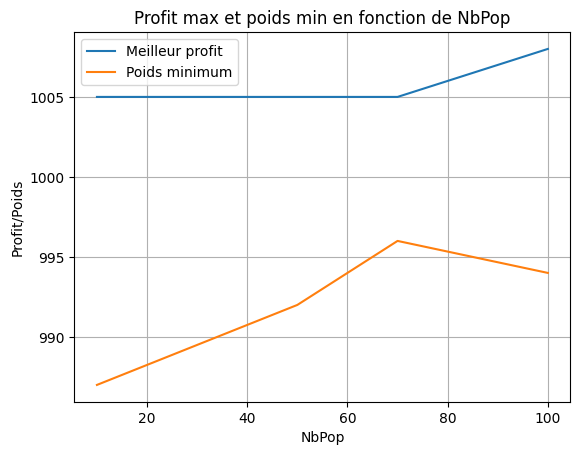

In [ ]:
x = nbPop_list
x1 = [max_profits_nbPop[i] for i in x]
x2 = [min_weights_nbPop[i] for i in x]

plt.plot(x, x1, label='Meilleur profit')
plt.plot(x, x2, label='Poids minimum')
plt.xlabel('NbPop')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de NbPop')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def find_optimal_solution(nbPop_list, nbGen_list, probaCross_list, nbBest_list, optimal_solution):

    filenames = []
    for nbPop in nbPop_list:
        for nbGen in nbGen_list:
          for probaCross in probaCross_list:
            for nbBest in nbBest_list:
                filename = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100_15.csv"
                if os.path.exists(filename):
                    try:
                        df = pd.read_csv(filename)
                        if optimal_solution in df["Nouvelle solution"].values:
                            filenames.append(filename)
                    except pd.errors.ParserError:
                        print(f"Warning: Could not parse file {filename}. Skipping.")
                else:
                    print(f"Fichier manquant: {filename}")

    return filenames


In [ ]:
def find_files_with_profit_and_weight(target_profit, target_weight, dossier="Resultats"):
    filenames = []

    for filename in os.listdir(dossier):
        if filename.startswith("NbPop") and filename.endswith(".csv"):
            filepath = os.path.join(dossier, filename)
            try:
                df = pd.read_csv(filepath)

                if 'Nouveau profit' in df.columns and 'Nouveau Poids' in df.columns:
                    condition = (df['Nouveau profit'] == target_profit) & (df['Nouveau Poids'] == target_weight)
                    if any(condition):
                        filenames.append(filename)
            except Exception as e:
                print(f"Erreur avec le fichier {filename}: {e}")

    return filenames


In [ ]:
fichier_optimal = find_optimal_solution(nbPop_list, nbGen_list, probaCross_list, nbBest_list, best_solution_str)
for f in fichier_optimal:
  print(f) #aucun fichier contient la solution optimale en termes de choix d'objets

In [ ]:
print(target_profit)
print(target_weight)
found_files = find_files_with_profit_and_weight(target_profit, target_weight)
for f in found_files:
  print(f)

1011.0
997


Ne pas executer si le resultat precedent est nul

In [ ]:
def analyze_files(found_files):
    nbPop_counts = {}
    nbGen_counts = {}
    probaCross_counts = {}
    nbBest_counts = {}

    for file in found_files:
      try:
          df = pd.read_csv(file)

          parts = file.split("_")

          pop_str = parts[0].split("NbPop")[1]
          nbPop_counts[int(pop_str)] = nbPop_counts.get(int(pop_str), 0) + 1

          gen_str = parts[1].split("NbGen")[1]
          nbGen_counts[int(gen_str)] = nbGen_counts.get(int(gen_str), 0) + 1

          probaCross_str = parts[2].split("ProbaCross")[1]
          probaCross_counts[float(probaCross_str)] = probaCross_counts.get(float(probaCross_str), 0) + 1

          best_str = parts[3].split("NbBest")[1]
          nbBest_counts[int(best_str)] = nbBest_counts.get(int(best_str), 0) + 1
      except pd.errors.ParserError:
          print(f"Fichier {file} non retrouve.")

    return nbPop_counts, nbGen_counts, probaCross_counts, nbBest_counts

In [ ]:
nbPop_dict, nbGen_dict, probaCross_dict, nbBest_dict = analyze_files(found_files)
print(nbPop_dict)
print(nbGen_dict)
print(probaCross_dict)
print(nbBest_dict)

max_nbPop = max(nbPop_dict, key=nbPop_dict.get)
print("Le nombre de population optimal est:", max_nbPop)
max_nbGen = max(nbGen_dict, key=nbGen_dict.get)
print("Le nombre de génération optimal est:", max_nbGen)
max_probaCross = max(probaCross_dict, key=probaCross_dict.get)
print("La probabilité de croisement optimale est:", max_probaCross)
max_nbBest = max(nbBest_dict, key=nbBest_dict.get)
print("Le nombre de meilleures solutions optimal est:", max_nbBest)

NameError: name 'analyze_files' is not defined

### Pi-15: n = 1000

In [ ]:
file_pi15_n1000 = "pi-15-1000-1000-001.kna"

def extract_data(file_path):
  with open(file_path, 'r') as f:
      content = f.readlines()
      profit = []
      weight = []
      for i in range(7, len(content)):
        profit.append(content[i].split(" ")[1])
        weight.append(content[i].split(" ")[2].split("\n")[0])
  return profit, weight

In [ ]:
profits_pi15_n1000, weights_pi15_n1000 = extract_data(file_pi15_n1000)
profits_pi15_n1000 = [int(i) for i in profits_pi15_n1000]
weights_pi15_n1000 = [int(i) for i in weights_pi15_n1000]
print(profits_pi15_n1000)
print(weights_pi15_n1000)
print(len(profits_pi15_n1000))
print(len(weights_pi15_n1000))

[96, 507, 417, 993, 651, 237, 459, 816, 447, 423, 792, 360, 669, 600, 9, 546, 336, 768, 996, 894, 633, 132, 429, 702, 618, 876, 720, 420, 795, 198, 999, 117, 909, 540, 708, 570, 537, 933, 726, 489, 774, 513, 81, 945, 60, 303, 765, 537, 726, 789, 480, 144, 339, 642, 198, 495, 66, 825, 210, 711, 801, 315, 291, 402, 468, 690, 834, 225, 246, 849, 114, 381, 363, 66, 486, 687, 288, 891, 24, 492, 891, 90, 183, 216, 18, 474, 420, 420, 357, 684, 306, 201, 387, 954, 501, 195, 738, 324, 993, 225, 261, 99, 210, 651, 921, 63, 960, 804, 519, 429, 537, 348, 153, 972, 663, 198, 93, 531, 126, 747, 471, 771, 936, 723, 897, 570, 174, 960, 384, 309, 972, 585, 48, 930, 570, 3, 21, 609, 888, 825, 930, 906, 243, 381, 378, 963, 891, 444, 216, 339, 162, 408, 159, 33, 204, 420, 153, 426, 333, 567, 840, 9, 918, 534, 234, 957, 591, 576, 747, 378, 858, 87, 435, 558, 279, 840, 735, 576, 126, 912, 741, 822, 627, 918, 201, 993, 150, 54, 759, 267, 258, 783, 117, 516, 180, 27, 381, 714, 267, 216, 450, 543, 666, 954, 72

In [ ]:
def extract_info(file_path):
  with open(file_path, 'r') as f:
      content = f.readlines()
      content_line4 = content[3].split("NB_ITEMS: ")
      nb_items = content_line4[1].split("\n")[0]
      content_line5 = content[4].split("MAX_CAPACITY: ")
      max_capacity = content_line5[1].split("\n")[0]
      max_capacity = int(max_capacity)

  return int(nb_items), int(max_capacity)

In [ ]:
nb_items_pi15_n1000, max_capacity_pi15_n1000 = extract_info(file_pi15_n1000)
print(nb_items_pi15_n1000)
print(max_capacity_pi15_n1000)

1000
4816


In [ ]:
def calculate_profit(
    solution: str,
    profits: list
  ):

  profit = 0
  for i in range(len(solution)):
    if solution[i] == "1":
      profit += int(profits[i])

  return profit

In [ ]:
def calculate_weight(
    solution: str,
    weights: list
  ):

  weight = 0
  for i in range(len(solution)):
    if solution[i] == "1":
      weight += int(weights[i])

  return weight

#### Création d'une solution valide (pas forcément optimale):
-->Ajouter des items aléatoirement dans le sac à dos jusqu'à arriver au poids maximal.

In [ ]:
import random

def gen_valid_solution(max_capacity, weights, nb_items):
    sol = []  #liste pour stocker la solution binaire
    current_capacity = 0

    for i in range(nb_items):
        if current_capacity >= max_capacity:
            sol.append("0")  # Si on atteint la limite, on met "0"
        else:
            bit = random.choice(["0", "1"])
            if bit == "1" and current_capacity + weights[i] > max_capacity:
                bit = "0"  # On force un "0" si ajouter 1 dépasse la capacité
            sol.append(bit)
            if bit == "1":
                current_capacity += weights[i]  # Mise à jour du poids

    return "".join(sol)


In [ ]:
print("Poids à ne pas dépasser: ",max_capacity_pi15_n1000)
a_solution = gen_valid_solution(max_capacity_pi15_n1000, weights_pi15_n1000, nb_items_pi15_n1000)
print("Une solution valide est: ", a_solution)
print("Le profit de cette solution est: ", calculate_profit(a_solution, profits_pi15_n1000))
print("Le poids total de cette solution est: ", calculate_weight(a_solution, weights_pi15_n1000))

Poids à ne pas dépasser:  4816
Une solution valide est:  0011011010111000100000000000000000000000000010000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000001000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

#### La solution optimale avec un solver

In [222]:
from ortools.linear_solver import pywraplp
import numpy as np
import time

def solve_knapsack(profits, weights, capacity_max):

    solver = pywraplp.Solver.CreateSolver('SCIP')
    if not solver:
        print("Solveur non disponible.")
        return None, None

    n = len(profits)

    x = [solver.BoolVar(f'x_{i}') for i in range(n)]

    # Ajout de la contrainte de capacité
    solver.Add(solver.Sum(weights[i] * x[i] for i in range(n)) <= capacity_max)

    # Définition de la fonction objectif : Maximiser le profit total
    solver.Maximize(solver.Sum(profits[i] * x[i] for i in range(n)))

    # Résolution du problème
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        # Extraction de la solution optimale
        best_solution = [int(x[i].solution_value()) for i in range(n)]
        best_profit = solver.Objective().Value()
        return best_solution, best_profit
    else:
        print("Aucune solution optimale trouvée.")
        return None, None
time1 = time.time()

best_solution, best_profit = solve_knapsack(profits_pi15_n1000, weights_pi15_n1000, max_capacity_pi15_n1000)

target_profit = best_profit
target_weight = sum(weights_pi15_n1000[i] for i in range(len(best_solution)) if best_solution[i] == 1)
if best_solution:
    print("Meilleure solution trouvée :", best_solution)
    print("Meilleur profit :", target_profit)
    print("Poids atteint :", target_weight)


indice = np.where(np.array(best_solution) == 1)[0]
print(indice)
time2 = time.time()
temps_exec1000 = time2 - time1
temps_solver.append(temps_exec1000)
print("Temps d'exécution : ",temps_exec1000 )
print(temps_solver)

Meilleure solution trouvée : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
best_solution_str = "".join(map(str, best_solution))
print("Meilleure solution trouvée (string):", best_solution_str)

Meilleure solution trouvée (string): 100000000000001000000000000000000000000000001000000000000000000000000000000000000000100000000000000001000000000000001000000000000000000010000000000000000100000000000000000000000000000000010000000100000000000000010000000000000100000000000001000100000001000000000000000000000000000000000001000100100010001100000000000000000000000101000000000000000000000000000000100000000000000000100001000000000000000100000000000000001000000001010000000000000000000100100000000010001000000000000001000000000000000000000001000000000000000000000000000000000000000000001000001100010000000000100000000100000000000001000000001000000000000000000000000000000100100000010010000000000000000000000000100100000000100000001000000000000000000000000001001001000000010100000000010000000000000000000000000000000100100000000000000000010010000110010000101000000000100000000001100000000000000000000000011000000000000100000000000000000000001000000000000000000000000000100000001000000000000000000000000

#### Métaheuristique 1 - Recuit simulé

In [ ]:
#Méthode de voisinage - Transformation locale (p. 98 du cours)
def generate_single_neighbor(current_solution: str):

    """Génère un seul voisin en modifiant un bit de la solution actuelle."""

    neighbor = list(current_solution)
    index = random.randint(0, len(current_solution) - 1)
    neighbor[index] = '1' if neighbor[index] == '0' else '0'

    return ''.join(neighbor)

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

def simulated_annealing(
    initial_solution: str,
    max_capacity: int,
    profits: list,
    weights: list,
    temperature: float,
    cooling_rate: float,
):
    current_solution = initial_solution
    current_profit = calculate_profit(current_solution, profits)
    current_weight = calculate_weight(current_solution, weights)

    best_solution = current_solution
    best_profit = current_profit

    iteration = 0

    # Listes pour stocker les valeurs à chaque itération
    profits_list = []
    weights_list = []

    while temperature > 1:
        iteration += 1

        # Générer un voisin valide (ne dépassant pas max_capacity)
        while True:
            neighbor = generate_single_neighbor(current_solution)
            neighbor_profit = calculate_profit(neighbor, profits)
            neighbor_weight = calculate_weight(neighbor, weights)

            if neighbor_weight <= max_capacity:
                break  # On garde ce voisin valide

        delta = neighbor_profit - current_profit

        if delta > 0:
            current_solution = neighbor
            current_profit = neighbor_profit
            if neighbor_profit > best_profit:
                best_solution = neighbor
                best_profit = neighbor_profit
        else:
            probability = np.exp(delta / temperature)
            if random.uniform(0, 1) < probability:
                current_solution = neighbor
                current_profit = neighbor_profit

        # Ajouter les valeurs actuelles de profit et poids dans les listes
        profits_list.append(current_profit)
        weights_list.append(current_weight)

        # Réduction progressive de la température
        temperature *= cooling_rate

    # Tracer l'évolution du profit et du poids
    plt.figure(figsize=(12, 6))

    # Tracer du profit au fil des itérations
    plt.subplot(1, 2, 1)
    plt.plot(profits_list, label='Profit', color='blue')
    plt.title('Évolution du profit au fil des itérations')
    plt.xlabel('Itérations')
    plt.ylabel('Profit')
    plt.grid(True)

    # Tracer du poids au fil des itérations
    plt.subplot(1, 2, 2)
    plt.plot(weights_list, label='Poids', color='red')
    plt.title('Évolution du poids au fil des itérations')
    plt.xlabel('Itérations')
    plt.ylabel('Poids')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return best_solution, best_profit, iteration


Poids à ne pas dépasser: 4816
Solution initiale choisie aléatoirement:  0111100001001010100000001000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

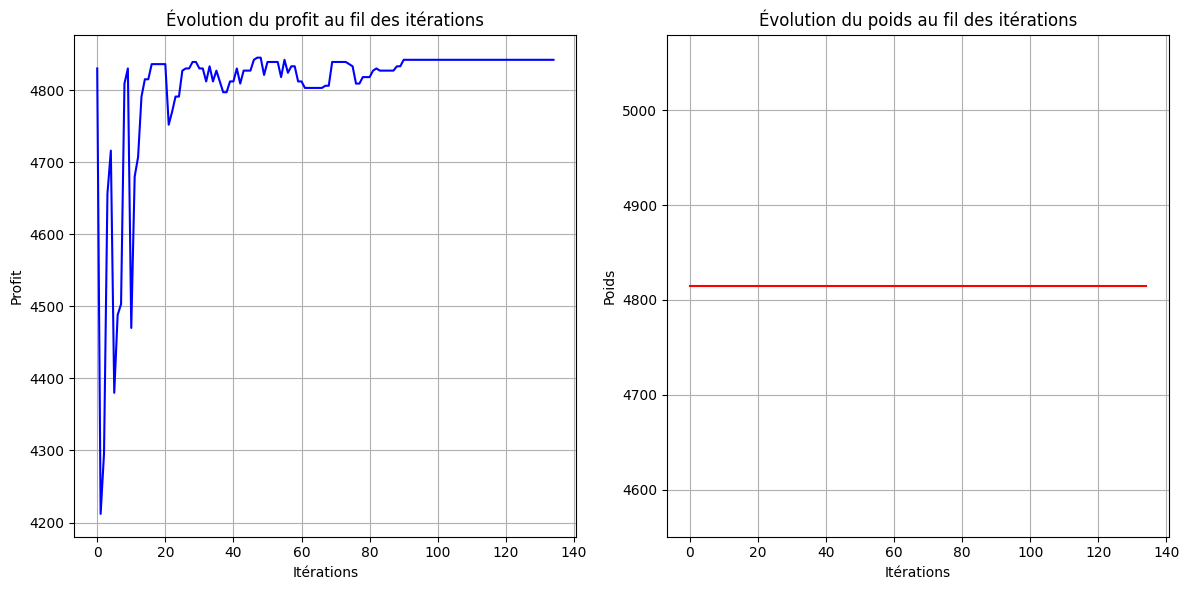

Meilleure solution trouvée : 01111000010010100000000000000100000000000000100000000000000000000000000000000000000010000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000010000000000000000000000000000000000000000000000000000000000000000000010000000000000000010000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000010000000000000100100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100010010000000000000000000000001000000000000000000000

In [ ]:
# Test du recuit simulé

print("Poids à ne pas dépasser:", max_capacity_pi15_n1000)
initial_solution = gen_valid_solution(max_capacity_pi15_n1000, weights_pi15_n1000, nb_items_pi15_n1000)

print("Solution initiale choisie aléatoirement: ",initial_solution)
print("Son profit actuel:",calculate_profit(initial_solution, profits_pi15_n1000))
print("Son poids actuel:",calculate_weight(initial_solution, weights_pi15_n1000))
print()

temperature = 1000
cooling_rate = 0.95

best_sol, best_prof, iterations = simulated_annealing(initial_solution, max_capacity_pi15_n1000, profits_pi15_n1000, weights_pi15_n1000, temperature, cooling_rate)
print("Meilleure solution trouvée :", best_sol)
print("Meilleur profit :", best_prof)
print("Poids atteind :", calculate_weight(best_sol, weights_pi15_n1000))
print(f"Solution trouvée en {iterations} itérations")


#### Tests


In [ ]:
import pandas as pd
import time

def test_recuit_simule(temperature, cooling_rate, max_capacity, profits, weights, nb_items):
    results = []

    # Générer une solution initiale valide
    initial_solution = gen_valid_solution(max_capacity, weights, nb_items)
    initial_profit = calculate_profit(initial_solution, profits)
    initial_weight = calculate_weight(initial_solution, weights)

    # Démarrer le chronomètre
    start_time = time.time()

    # Appliquer le recuit simulé
    best_solution, best_profit, iterations = simulated_annealing(
        initial_solution, max_capacity, profits, weights, temperature, cooling_rate
    )

    # Arrêter le chronomètre
    end_time = time.time()
    execution_time = end_time - start_time  # Temps en secondes

    best_weight = calculate_weight(best_solution, weights)
    nb_objects = 0
    for i in range(len(best_solution)):
      if best_solution[i] == "1":
        nb_objects += 1

    # Enregistrement des résultats
    results.append({
        "Solution initiale": initial_solution,
        "Profit initial": initial_profit,
        "Poids initial": initial_weight,
        "Temperature": temperature,
        "Cooling Rate": cooling_rate,
        "Nouvelle solution": best_solution,
        "Nouveau profit": best_profit,
        "Nouveau Poids": best_weight,
        "Nb Itérations": iterations,
        "Nb objets": nb_objects,
        "Temps (s)": execution_time
    })

    # Convertir en DataFrame pandas
    df = pd.DataFrame(results)

    return df

In [ ]:
temperatures = [100, 200, 500, 700, 1000, 2000, 5000, 7000, 10000]
cooling_rates = [round(0.85 + i * 0.01, 2) for i in range(15)] # pour [0.85, 0.86, ..., 0.99]

'''for temperature in temperatures:
    for cooling_rate in cooling_rates:
        print(f"Temp {temperature}\nCooling rate {cooling_rate}")
        test = test_recuit_simule(temperature, cooling_rate, max_capacity_pi15_n1000, profits_pi15_n1000, weights_pi15_n1000, nb_items_pi15_n1000)
        test.to_csv(f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule{nb_items_pi15_n1000}_15.csv", index=False)
'''

'for temperature in temperatures:\n    for cooling_rate in cooling_rates:\n        print(f"Temp {temperature}\nCooling rate {cooling_rate}")\n        test = test_recuit_simule(temperature, cooling_rate, max_capacity_pi15_n1000, profits_pi15_n1000, weights_pi15_n1000, nb_items_pi15_n1000)\n        test.to_csv(f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule{nb_items_pi15_n1000}_15.csv", index=False)\n'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_profit_from_temp(temperatures, cooling_rates):
    max_profits = {}

    for temperature in temperatures:
        max_profit = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_profit = max(max_profit, df["Nouveau profit"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_profits[temperature] = max_profit

    return max_profits


In [ ]:
import pandas as pd
import os

def extract_max_profit_from_CR(temperatures, cooling_rates):
    max_profits = {}

    for cooling_rate in cooling_rates:
        max_profit = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nouveau profit"].max()
                max_profit = max(max_profit, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        max_profits[cooling_rate] = max_profit if max_profit != float('-inf') else None

    return max_profits


In [ ]:
max_profits_temp = extract_max_profit_from_temp(temperatures, cooling_rates)
print(max_profits_temp)

{100: np.int64(4839), 200: np.int64(4845), 500: np.int64(4854), 700: np.int64(4863), 1000: np.int64(4863), 2000: np.int64(4869), 5000: np.int64(4872), 7000: np.int64(4875), 10000: np.int64(4881)}


In [ ]:
max_profits_CR = extract_max_profit_from_CR(temperatures, cooling_rates)
print(max_profits_CR)

{0.85: np.int64(4842), 0.86: np.int64(4848), 0.87: np.int64(4848), 0.88: np.int64(4851), 0.89: np.int64(4851), 0.9: np.int64(4857), 0.91: np.int64(4845), 0.92: np.int64(4857), 0.93: np.int64(4851), 0.94: np.int64(4857), 0.95: np.int64(4857), 0.96: np.int64(4860), 0.97: np.int64(4869), 0.98: np.int64(4872), 0.99: np.int64(4881)}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_min_weight_from_temp(temperatures, cooling_rates):
    min_weights = {}

    for temperature in temperatures:
        min_weight = float('inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                min_weight = min(min_weight, df["Nouveau Poids"].min())
            else:
                print(f"Warning: File {file_name} not found.")

        min_weights[temperature] = min_weight

    return min_weights

In [ ]:
def extract_min_weight_from_CR(temperatures, cooling_rates):
    min_weights = {}

    for cooling_rate in cooling_rates:
        min_weight = float('inf')

        for temperature in temperatures:
            filename = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_15.csv"

            if os.path.exists(filename):
                df = pd.read_csv(filename)
                min_weight = min(min_weight, df["Nouveau Poids"].min())
            else:
                print(f"Fichier manquant: {filename}")

        min_weights[cooling_rate] = min_weight

    return min_weights


In [ ]:
min_weights_temp = extract_min_weight_from_temp(temperatures, cooling_rates)
print(min_weights_temp)

{100: np.int64(4814), 200: np.int64(4814), 500: np.int64(4813), 700: np.int64(4814), 1000: np.int64(4814), 2000: np.int64(4814), 5000: np.int64(4813), 7000: np.int64(4811), 10000: np.int64(4812)}


In [ ]:
min_weights_CR = extract_min_weight_from_CR(temperatures, cooling_rates)
print(min_weights_CR)

{0.85: np.int64(4812), 0.86: np.int64(4814), 0.87: np.int64(4814), 0.88: np.int64(4811), 0.89: np.int64(4814), 0.9: np.int64(4814), 0.91: np.int64(4812), 0.92: np.int64(4814), 0.93: np.int64(4811), 0.94: np.int64(4814), 0.95: np.int64(4815), 0.96: np.int64(4813), 0.97: np.int64(4812), 0.98: np.int64(4812), 0.99: np.int64(4813)}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_min_object_from_temp(temperatures, cooling_rates):
    min_objects = {}

    for temperature in temperatures:
        min_object = float('inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                min_object = min(min_object, df["Nb objets"].min())
            else:
                print(f"Fichier manquant: {file_name}")

        min_objects[temperature] = min_object

    return min_objects

In [ ]:
import pandas as pd
import os

def extract_min_object_from_CR(temperatures, cooling_rates):
    min_objects = {}

    for cooling_rate in cooling_rates:
        min_object = float('inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_min = df["Nb objets"].min()
                min_object = min(min_object, current_min)
            else:
                print(f"Fichier manquant: {file_name}")

        if min_object != float('inf'):
            min_objects[cooling_rate] = min_object
        else:
            min_objects[cooling_rate] = None

    return min_objects


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_object_from_temp(temperatures, cooling_rates):
    max_objects = {}

    for temperature in temperatures:
        max_object = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_object = max(max_object, df["Nb objets"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_objects[temperature] = max_object

    return max_objects

In [ ]:
import pandas as pd
import os

def extract_max_object_from_CR(temperatures, cooling_rates):
    max_objects = {}

    for cooling_rate in cooling_rates:
        max_object = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nb objets"].max()
                max_object = max(max_object, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_object != float('-inf'):
            max_objects[cooling_rate] = max_object
        else:
            max_objects[cooling_rate] = None

    return max_objects


In [ ]:
max_objects_temp = extract_max_object_from_temp(temperatures, cooling_rates)
print(max_objects_temp)
min_objects_temp = extract_min_object_from_temp(temperatures, cooling_rates)
print(min_objects_temp)

{100: 13, 200: 14, 500: 15, 700: 27, 1000: 25, 2000: 20, 5000: 31, 7000: 33, 10000: 26}
{100: 8, 200: 9, 500: 9, 700: 9, 1000: 8, 2000: 9, 5000: 11, 7000: 10, 10000: 9}


In [ ]:
max_objects_CR = extract_max_object_from_CR(temperatures, cooling_rates)
print(max_objects_CR)
min_objects_CR = extract_min_object_from_CR(temperatures, cooling_rates)
print(min_objects_CR)

{0.85: 15, 0.86: 15, 0.87: 18, 0.88: 18, 0.89: 21, 0.9: 21, 0.91: 17, 0.92: 23, 0.93: 23, 0.94: 26, 0.95: 17, 0.96: 18, 0.97: 30, 0.98: 24, 0.99: 33}
{0.85: 8, 0.86: 9, 0.87: 9, 0.88: 8, 0.89: 10, 0.9: 10, 0.91: 10, 0.92: 9, 0.93: 10, 0.94: 9, 0.95: 9, 0.96: 8, 0.97: 10, 0.98: 10, 0.99: 10}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_iterations_from_temp(temperatures, cooling_rates):
    max_iterations = {}

    for temperature in temperatures:
        max_iteration = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_iteration = max(max_iteration, df["Nb Itérations"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_iterations[temperature] = max_iteration

    return max_iterations

In [ ]:
import pandas as pd
import os

def extract_max_iterations_from_CR(temperatures, cooling_rates):
    max_iterations = {}

    for cooling_rate in cooling_rates:
        max_iteration = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nb Itérations"].max()
                max_iteration = max(max_iteration, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_iteration != float('-inf'):
            max_iterations[cooling_rate] = max_iteration
        else:
            max_iterations[cooling_rate] = None

    return max_iterations


In [ ]:
max_iterations_temp = extract_max_iterations_from_temp(temperatures, cooling_rates)
print(max_iterations_temp)

{100: 459, 200: 528, 500: 619, 700: 652, 1000: 688, 2000: 757, 5000: 848, 7000: 881, 10000: 917}


In [ ]:
max_iterations_CR = extract_max_iterations_from_CR(temperatures, cooling_rates)
print(max_iterations_CR)

{0.85: 57, 0.86: 62, 0.87: 67, 0.88: 73, 0.89: 80, 0.9: 88, 0.91: 98, 0.92: 111, 0.93: 127, 0.94: 149, 0.95: 180, 0.96: 226, 0.97: 303, 0.98: 456, 0.99: 917}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_time_from_temp(temperatures, cooling_rates):
    max_times = {}

    for temperature in temperatures:
        max_time = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_time = max(max_time, df["Temps (s)"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_times[temperature] = max_time

    return max_times

In [ ]:
import pandas as pd
import os

def extract_max_time_from_CR(temperatures, cooling_rates):
    max_times = {}

    for cooling_rate in cooling_rates:
        max_time = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Temps (s)"].max()
                max_time = max(max_time, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_time != float('-inf'):
            max_times[cooling_rate] = max_time
        else:
            max_times[cooling_rate] = None

    return max_times


In [ ]:
max_time_temp = extract_max_time_from_temp(temperatures, cooling_rates)
print(max_time_temp)

{100: 4.254718065261841, 200: 6.044326543807983, 500: 2.6376495361328125, 700: 2.959451675415039, 1000: 2.8687705993652344, 2000: 2.387779474258423, 5000: 2.346730232238769, 7000: 2.650384426116944, 10000: 2.6352286338806152}


In [ ]:
max_time_CR = extract_max_time_from_CR(temperatures, cooling_rates)
print(max_time_CR)

{0.85: 0.4163100719451904, 0.86: 0.5868146419525146, 0.87: 0.4755353927612304, 0.88: 0.5891842842102051, 0.89: 0.6987614631652832, 0.9: 0.6082844734191895, 0.91: 0.6951704025268555, 0.92: 1.2809410095214844, 0.93: 1.6132252216339111, 0.94: 1.1432812213897705, 0.95: 1.48986554145813, 0.96: 2.0671019554138184, 0.97: 2.4434616565704346, 0.98: 2.3011815547943115, 0.99: 6.044326543807983}


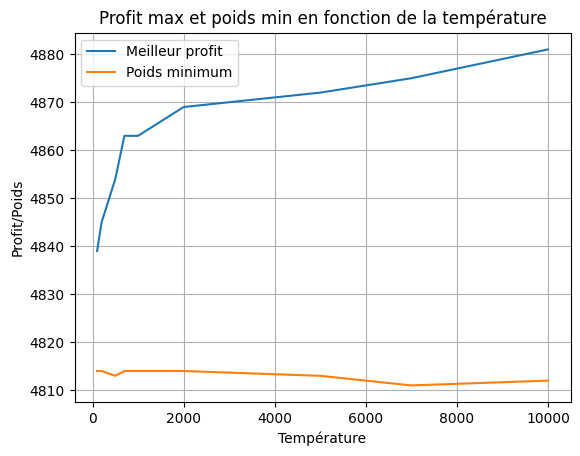

In [ ]:
x = temperatures
y1 = [max_profits_temp[temp] for temp in temperatures]
y2 = [min_weights_temp[temp] for temp in temperatures]

plt.plot(x, y1, label='Meilleur profit')
plt.plot(x, y2, label='Poids minimum')
plt.xlabel('Température')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de la température')
plt.legend()
plt.grid()
plt.show()

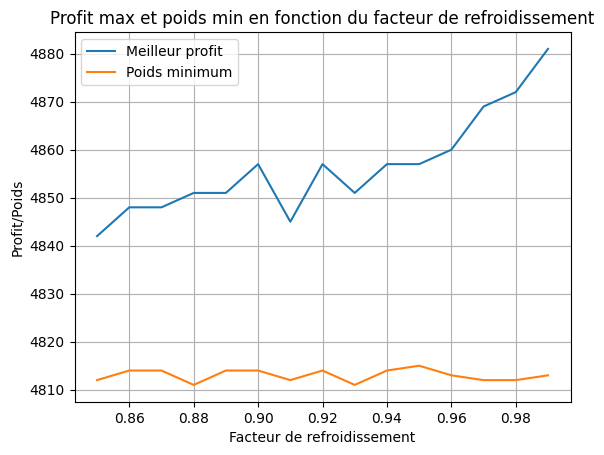

In [ ]:
z = cooling_rates
z1 = [max_profits_CR[cr] for cr in cooling_rates]
z2 = [min_weights_CR[cr] for cr in cooling_rates]

plt.plot(z, z1, label='Meilleur profit')
plt.plot(z, z2, label='Poids minimum')
plt.xlabel('Facteur de refroidissement')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction du facteur de refroidissement')
plt.legend()
plt.grid()
plt.show()

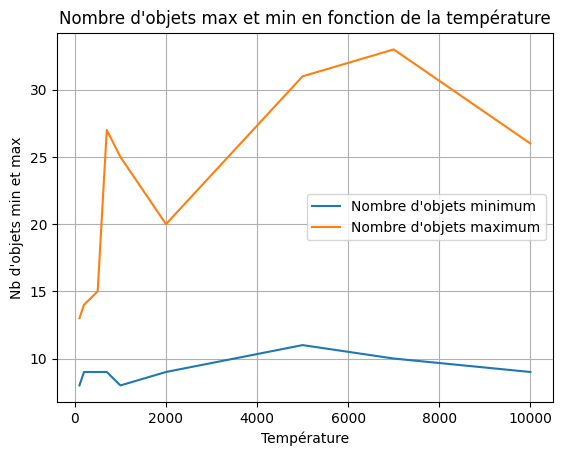

In [ ]:
y3 = [min_objects_temp[temp] for temp in temperatures]
y4 = [max_objects_temp[temp] for temp in temperatures]

plt.plot(x, y3, label='Nombre d\'objets minimum')
plt.plot(x, y4, label='Nombre d\'objets maximum')
plt.title("Nombre d'objets max et min en fonction de la température")
plt.xlabel('Température')
plt.ylabel("Nb d'objets min et max")
plt.legend()
plt.grid()
plt.show()

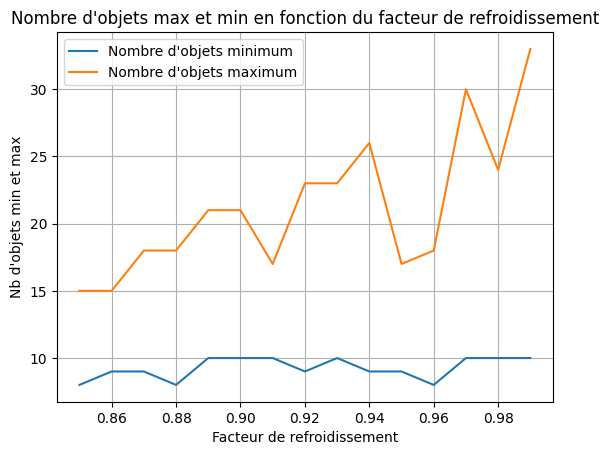

In [ ]:
z3 = [min_objects_CR[cr] for cr in cooling_rates]
z4 = [max_objects_CR[cr] for cr in cooling_rates]

plt.plot(z, z3, label='Nombre d\'objets minimum')
plt.plot(z, z4, label='Nombre d\'objets maximum')
plt.title("Nombre d'objets max et min en fonction du facteur de refroidissement")
plt.xlabel('Facteur de refroidissement')
plt.ylabel("Nb d'objets min et max")
plt.legend()
plt.grid()
plt.show()

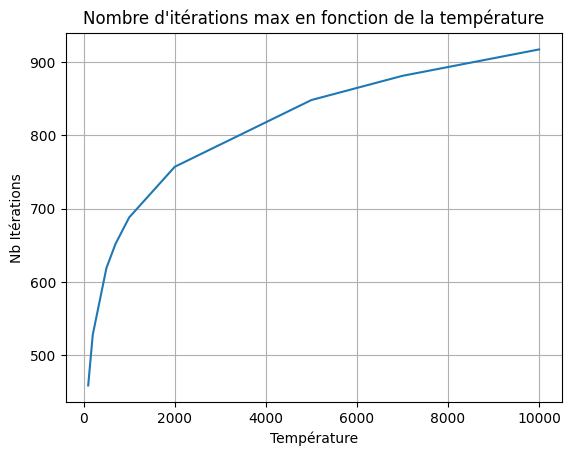

In [ ]:
y5 = [max_iterations_temp[temp] for temp in temperatures]

plt.plot(x, y5, label='Nombre d\'itérations maximum')
plt.title('Nombre d\'itérations max en fonction de la température')
plt.xlabel('Température')
plt.ylabel('Nb Itérations')
plt.grid()
plt.show()

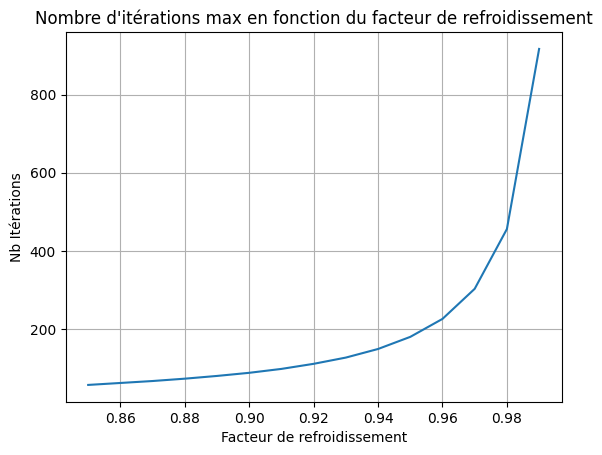

In [ ]:
z5 = [max_iterations_CR[cr] for cr in cooling_rates]

plt.plot(z, z5, label='Nombre d\'itérations maximum')
plt.title('Nombre d\'itérations max en fonction du facteur de refroidissement')
plt.xlabel('Facteur de refroidissement')
plt.ylabel('Nb Itérations')
plt.grid()
plt.show()

     Température    CR  Profit max
0            100  0.85        4848
1            100  0.86        4848
2            100  0.87        4848
3            100  0.88        4848
4            100  0.89        4848
..           ...   ...         ...
130        10000  0.95        4848
131        10000  0.96        4848
132        10000  0.97        4848
133        10000  0.98        4848
134        10000  0.99        4848

[135 rows x 3 columns]
                            OLS Regression Results                            
Dep. Variable:             Profit max   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -66.00
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               1.00
Time:                        15:51:35   Log-Likelihood:                 3337.2
No. Observations:                 135   AIC:                            -6668.
Df 

c:\Users\cerik\OneDrive\Desktop\4A INFO\Projet Knapsack\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


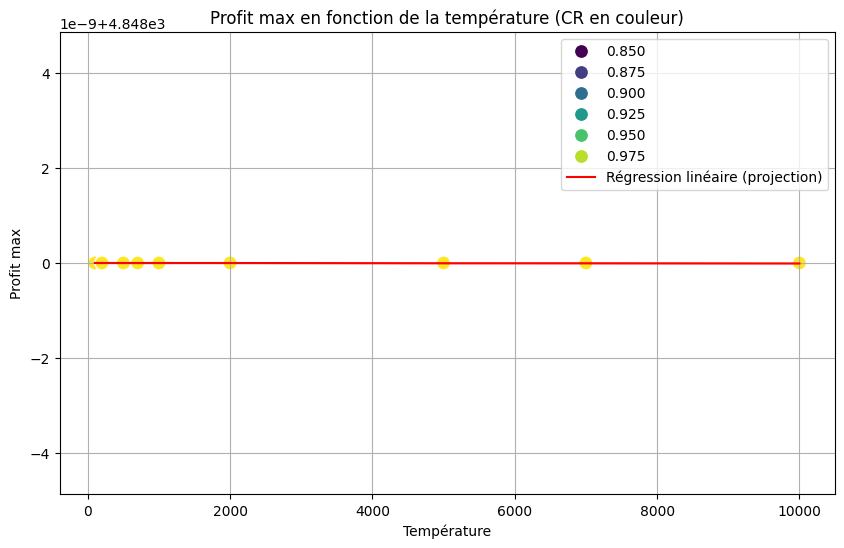

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

def collecter_donnees_recuit(temp_list, cr_list, n, fichier):
    donnees = []

    for temp in temp_list:
        for cr in cr_list:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule{n}_{fichier}.csv"
            
            if os.path.exists(file_name):
                try:
                    df = pd.read_csv(file_name)
                    if 'Nouveau profit' in df.columns:
                        profit = df['Nouveau profit'].iloc[0]
                        donnees.append({
                            "Température": temp,
                            "CR": cr,
                            "Profit max": profit
                        })
                    else:
                        print(f"'profit_final' manquant dans {file_name}")
                except Exception as e:
                    print(f"Erreur de lecture {file_name} : {e}")
            else:
                print(f"Fichier introuvable : {file_name}")

    return pd.DataFrame(donnees)

data_pi12_n100 = collecter_donnees_recuit(temperatures, cooling_rates, 1000, 15)
print(data_pi12_n100)

def tracer_regression_lineaire(df):
    X = df[["Température", "CR"]]
    y = df["Profit max"]

    X = sm.add_constant(X)

    # Régression linéaire
    model = sm.OLS(y, X).fit()
    print(model.summary())

    # Extraction des coefficients
    a = model.params["Température"]
    b = model.params["CR"]
    c = model.params["const"]

    print(f"L'équation de régression linéaire est : Profit max = {a:.4f} * Température + {b:.4f} * CR + {c:.4f}")

    y_pred = model.predict(X)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x="Température", y="Profit max", hue="CR", palette="viridis", s=100)
    sns.lineplot(x=df["Température"], y=y_pred, color="red", label="Régression linéaire (projection)")
    plt.title("Profit max en fonction de la température (CR en couleur)")
    plt.legend()
    plt.grid()
    plt.show()

tracer_regression_lineaire(data_pi12_n100)


In [ ]:
import os
import pandas as pd

def find_optimal_solution(temperatures, cooling_rates, optimal_solution):
    filenames = []
    for temp in temperatures:
        for cr in cooling_rates:
            filename = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_15.csv"
            if os.path.exists(filename):
                try:
                    df = pd.read_csv(filename)
                    if "Nouvelle solution" in df.columns:
                        if optimal_solution in df["Nouvelle solution"].values:
                            filenames.append(filename)
                except pd.errors.ParserError:
                    print(f"Warning: Could not parse file {filename}. Skipping.")
    return filenames

In [ ]:
def find_files_with_profit_and_weight(target_profit, target_weight, dossier="Resultats"):
    filenames = []
    for filename in os.listdir(dossier):
        if filename.startswith("Temp") and filename.endswith("1000_15.csv"):
            full_path = os.path.join(dossier, filename)
            try:
                df = pd.read_csv(full_path)
                if 'Nouveau profit' in df.columns and 'Nouveau Poids' in df.columns:
                    match = (df['Nouveau profit'] == target_profit) & (df['Nouveau Poids'] == target_weight)
                    if any(match):
                        filenames.append(filename)
            except pd.errors.ParserError:
                print(f"Fichier {filename} non retrouve.")
    return filenames


In [ ]:
fichier_optimal = find_optimal_solution(temperatures, cooling_rates, best_solution_str)

if len(fichier_optimal) == 0:
    print("Le recuit simulé n'a pas abouti à la solution optimale en termes de choix/répartition d'objets.")
else:
    for f in fichier_optimal:
        print(f)

Le recuit simulé n'a pas abouti à la solution optimale en termes de choix/répartition d'objets.


A éxecuter uniquement si le recuit simulé a pu donner la solution optimale 

In [ ]:
found_files = find_files_with_profit_and_weight(target_profit, target_weight)
for f in found_files:
  print(f)

In [ ]:
def analyze_files(found_files):
    temp_counts = {}
    cr_counts = {}

    for file in found_files:
        try:
            df = pd.read_csv(file)

            # Extract temperature and cooling rate from the filename
            parts = file.split("_")
            temp_str = parts[0].split("Temp")[1]
            cr_str = parts[1].split("CR")[1].split("resultats")[0]

            temperature = int(temp_str)
            cooling_rate = float(cr_str)

            # Update counts
            temp_counts[temperature] = temp_counts.get(temperature, 0) + 1
            cr_counts[cooling_rate] = cr_counts.get(cooling_rate, 0) + 1

        except FileNotFoundError:
            print(f"File not found: {file}")
        except (pd.errors.EmptyDataError, pd.errors.ParserError):
            print(f"Error reading file or empty file: {file}")
        except Exception as e:
            print(f"An unexpected error occurred with file {file}: {e}")


    return temp_counts, cr_counts

In [ ]:
temp_dict, cr_dict = analyze_files(found_files)

print("Temperature counts:", temp_dict)
print("Cooling rate counts:", cr_dict)

max_temps = max(temp_dict, key=temp_dict.get)
print("La température optimale est:", max_temps)
max_crs = max(cr_dict, key=cr_dict.get)
print("Le facteur de refroidissement optimal est:", max_crs)

Temperature counts: {}
Cooling rate counts: {}


ValueError: max() arg is an empty sequence

#### Métaheuristique 2 - Génétique

In [ ]:
def roulette_selection(population, profits):
    # Calcul du profit total pour la population
    fitness = [calculate_profit(sol, profits) for sol in population]
    total_fitness = sum(fitness)

    # Si la fitness totale est 0, on retourne un choix aléatoire
    if total_fitness == 0:
        return random.choice(population)

    # Sélection d'un parent par roulette
    pick = random.uniform(0, total_fitness)
    current = 0
    for i, sol in enumerate(population):
        current += fitness[i]
        if current > pick:
            return sol
    return population[-1]  # Retourne le dernier si aucune sélection avant


In [ ]:
def crossover(nb_items, parent1, parent2, max_capacity, weights):
    point = random.randint(1, nb_items - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]

    # Vérification si les enfants sont valides
    if calculate_weight(child1, weights) > max_capacity:
        child1 = parent1  # Si l'enfant dépasse la capacité, on garde le parent
    if calculate_weight(child2, weights) > max_capacity:
        child2 = parent2  # Idem pour l'autre enfant

    return child1, child2


In [ ]:
def mutate(nb_items, max_capacity, weights, solution):
    sol_list = list(solution)
    index = random.randint(0, nb_items - 1)
    sol_list[index] = "1" if sol_list[index] == "0" else "0"

    # Vérification de la validité après mutation
    new_sol = "".join(sol_list)
    if calculate_weight(new_sol, weights) <= max_capacity:
        return new_sol  # Retourner la solution si elle respecte la capacité
    return solution  # Si la mutation rend la solution invalide, on garde l'ancienne solution


In [ ]:
import matplotlib.pyplot as plt

def algo_genetique(
      nb_items: int,
      max_capacity: int,
      weights: list,
      profits: list,
      nbPop: int,
      nbGen: int,
      probaCross: float,
      nbBest: int
    ):

    # Initialisation de la population
    population = [gen_valid_solution(max_capacity, weights, nb_items) for _ in range(nbPop)]
    best_solution = max(population, key=lambda sol: calculate_profit(sol, profits))
    best_profit = calculate_profit(best_solution, profits)

    # Pour le graphique
    evolution_profits = []
    evolution_weights = []

    for generation in range(nbGen):
        new_population = []

        # Sélection et reproduction
        for _ in range(nbPop):
            parent1 = roulette_selection(population, profits)
            parent2 = roulette_selection(population, profits)

            # Croisement ou mutation
            if random.random() < probaCross:
                child1, child2 = crossover(nb_items, parent1, parent2, max_capacity, weights)
            else:
                child1 = mutate(nb_items, max_capacity, weights, parent1)
                child2 = mutate(nb_items, max_capacity, weights, parent2)

            new_population.append(child1)
            new_population.append(child2)

        # Garder les meilleures solutions
        population = sorted(new_population, key=lambda sol: calculate_profit(sol, profits), reverse=True)[:nbPop]

        # Meilleure solution actuelle
        current_best_solution = population[0]
        current_best_profit = calculate_profit(current_best_solution, profits)
        current_best_weight = calculate_weight(current_best_solution, weights)

        # Enregistrer l’évolution
        evolution_profits.append(current_best_profit)
        evolution_weights.append(current_best_weight)

        # Mettre à jour la meilleure globale
        if current_best_profit > best_profit:
            best_solution = current_best_solution
            best_profit = current_best_profit

    # Tracer l'évolution du profit et du poids
    '''plt.figure(figsize=(12, 6))

    # Tracer du profit au fil des itérations
    plt.subplot(1, 2, 1)
    plt.plot(evolution_profits, label='Profit', color='blue')
    plt.title('Évolution du profit au fil des itérations')
    plt.xlabel('Itérations')
    plt.ylabel('Profit')
    plt.grid(True)

    # Tracer du poids au fil des itérations
    plt.subplot(1, 2, 2)
    plt.plot(evolution_weights, label='Poids', color='red')
    plt.title('Évolution du poids au fil des itérations')
    plt.xlabel('Itérations')
    plt.ylabel('Poids')
    plt.grid(True)

    plt.tight_layout()
    plt.show()'''

    return best_solution, best_profit


In [ ]:
nbPop = 10  # Taille de la population
nbGen = 100  # Nombre de générations
probaCross = 0.7  # Probabilité de croisement
nbBest = 2  # Nombre de meilleures solutions conservées

best_solution, best_profit = algo_genetique(nb_items_pi15_n1000, max_capacity_pi15_n1000, weights_pi15_n1000, profits_pi15_n1000, nbPop, nbGen, probaCross, nbBest)
print("Meilleure solution trouvée :", best_solution)
print("Meilleur profit :", best_profit)
print("Poids atteind :", calculate_weight(best_solution, weights_pi15_n1000))

Meilleure solution trouvée : 00111110000101110000010000000101000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

#### Tests

In [ ]:
import pandas as pd
import time
import os

def test_algo_genetique(nb_items, max_capacity, weights, profits, nbPop, nbGen, probaCross, nbBest):
                    results = []
                    
                    # Générer une solution initiale valide
                    initial_solution = gen_valid_solution(max_capacity, weights, nb_items)
                    initial_profit = calculate_profit(initial_solution, profits)
                    initial_weight = calculate_weight(initial_solution, weights)

                    # Démarrer le chronomètre
                    start_time = time.time()

                    # Exécuter l'algorithme génétique
                    best_solution, best_profit = algo_genetique(
                        nb_items, max_capacity, weights, profits, nbPop, nbGen, probaCross, nbBest
                    )

                    # Arrêter le chronomètre
                    end_time = time.time()
                    execution_time = end_time - start_time  # Temps en secondes

                    # Calculer le poids et le nombre d'objets de la meilleure solution
                    best_weight = calculate_weight(best_solution, weights)
                    nb_objects = sum(1 for i in range(len(best_solution)) if best_solution[i] == "1")

                    # Enregistrement des résultats
                    results.append({
                        "Solution initiale": initial_solution,
                        "Profit initial": initial_profit,
                        "Poids initial": initial_weight,
                        "NbPop": nbPop,
                        "NbGen": nbGen,
                        "ProbaCross": probaCross,
                        "NbBest": nbBest,
                        "Nouvelle solution": best_solution,
                        "Nouveau profit": best_profit,
                        "Nouveau Poids": best_weight,
                        "Nb objets": nb_objects,
                        "Temps (s)": execution_time
                    })

                    # Convertir en DataFrame et sauvegarder le fichier
                    df = pd.DataFrame(results)
                    return df
                


In [ ]:
# Fixer un interval pour les paramètres

nbPop_list = [10, 50, 70, 100]
nbGen_list = [10, 50, 70, 100]
probaCross_list = [0.1, 0.5, 0.9]
nbBest_list = [2, 5]

'''for nbPop in nbPop_list:
    for nbGen in nbGen_list:
        for probaCross in probaCross_list:
            for nbBest in nbBest_list:
                print(f"NbPop {nbPop}\nNbGen {nbGen}\nProbaCross {probaCross}\nNbBest {nbBest}")
                test = test_algo_genetique(nb_items_pi15_n1000, max_capacity_pi15_n1000, weights_pi15_n1000, profits_pi15_n1000, nbPop, nbGen, probaCross, nbBest)
                test.to_csv(f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000_15.csv", index=False)
'''

NbPop 10
NbGen 10
ProbaCross 0.1
NbBest 2
NbPop 10
NbGen 10
ProbaCross 0.1
NbBest 5
NbPop 10
NbGen 10
ProbaCross 0.5
NbBest 2
NbPop 10
NbGen 10
ProbaCross 0.5
NbBest 5
NbPop 10
NbGen 10
ProbaCross 0.9
NbBest 2
NbPop 10
NbGen 10
ProbaCross 0.9
NbBest 5
NbPop 10
NbGen 50
ProbaCross 0.1
NbBest 2
NbPop 10
NbGen 50
ProbaCross 0.1
NbBest 5
NbPop 10
NbGen 50
ProbaCross 0.5
NbBest 2
NbPop 10
NbGen 50
ProbaCross 0.5
NbBest 5
NbPop 10
NbGen 50
ProbaCross 0.9
NbBest 2
NbPop 10
NbGen 50
ProbaCross 0.9
NbBest 5
NbPop 10
NbGen 70
ProbaCross 0.1
NbBest 2
NbPop 10
NbGen 70
ProbaCross 0.1
NbBest 5
NbPop 10
NbGen 70
ProbaCross 0.5
NbBest 2
NbPop 10
NbGen 70
ProbaCross 0.5
NbBest 5
NbPop 10
NbGen 70
ProbaCross 0.9
NbBest 2
NbPop 10
NbGen 70
ProbaCross 0.9
NbBest 5
NbPop 10
NbGen 100
ProbaCross 0.1
NbBest 2
NbPop 10
NbGen 100
ProbaCross 0.1
NbBest 5
NbPop 10
NbGen 100
ProbaCross 0.5
NbBest 2
NbPop 10
NbGen 100
ProbaCross 0.5
NbBest 5
NbPop 10
NbGen 100
ProbaCross 0.9
NbBest 2
NbPop 10
NbGen 100
ProbaCross

In [ ]:
def extract_max_profit_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for probaCross in probaCross_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000_15.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[probaCross] = max_profit

    return max_profits

In [ ]:
def extract_min_weight_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for probaCross in probaCross_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000_15.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[probaCross] = min_weight

    return min_weights


In [ ]:
max_profits_probaCross = extract_max_profit_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_probaCross)

{0.1: np.int64(4842), 0.5: np.int64(4845), 0.9: np.int64(4845)}


In [ ]:
min_weights_probaCross = extract_min_weight_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_probaCross)

{0.1: np.int64(4813), 0.5: np.int64(4812), 0.9: np.int64(4812)}


In [ ]:
def extract_max_profit_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbGen in nbGen_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000_15.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbGen] = max_profit

    return max_profits


In [ ]:
def extract_min_weight_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbGen in nbGen_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000_15.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbGen] = min_weight

    return min_weights

In [ ]:
max_profits_nbGen = extract_max_profit_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_nbGen)

{10: np.int64(4845), 50: np.int64(4845), 70: np.int64(4842), 100: np.int64(4842)}


In [ ]:
min_weights_nbGen = extract_min_weight_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_nbGen)

{10: np.int64(4812), 50: np.int64(4813), 70: np.int64(4813), 100: np.int64(4812)}


In [ ]:
def extract_max_profit_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbBest in nbBest_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for probaCross in probaCross_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000_15.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbBest] = max_profit

    return max_profits

In [ ]:
def extract_min_weight_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbBest in nbBest_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for probaCross in probaCross_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000_15.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbBest] = min_weight

    return min_weights

In [ ]:
max_profits_nbBest = extract_max_profit_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_nbBest)

{2: np.int64(4845), 5: np.int64(4845)}


In [ ]:
min_weights_nbBest = extract_min_weight_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_nbBest)

{2: np.int64(4812), 5: np.int64(4812)}


In [ ]:
def extract_max_profit_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbPop in nbPop_list:
        max_profit = float('-inf')

        for nbGen in nbGen_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000_15.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbPop] = max_profit

    return max_profits

In [ ]:
def extract_min_weight_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbPop in nbPop_list:
        min_weight = float('inf')

        for nbGen in nbGen_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000_15.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbPop] = min_weight

    return min_weights

In [ ]:
max_profits_nbPop = extract_max_profit_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_nbPop)

{10: np.int64(4842), 50: np.int64(4842), 70: np.int64(4845), 100: np.int64(4845)}


In [ ]:
min_weights_nbPop = extract_min_weight_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_nbPop)

{10: np.int64(4812), 50: np.int64(4812), 70: np.int64(4814), 100: np.int64(4813)}


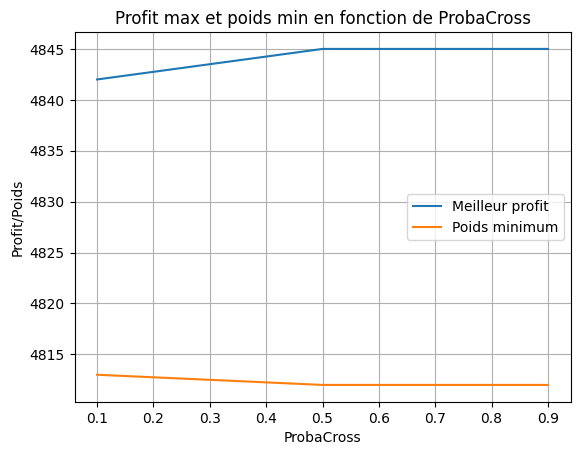

In [ ]:
y = probaCross_list
y1 = [max_profits_probaCross[i] for i in y]
y2 = [min_weights_probaCross[i] for i in y]

plt.plot(y, y1, label='Meilleur profit')
plt.plot(y, y2, label='Poids minimum')
plt.xlabel('ProbaCross')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de ProbaCross')
plt.legend()
plt.grid()
plt.show()

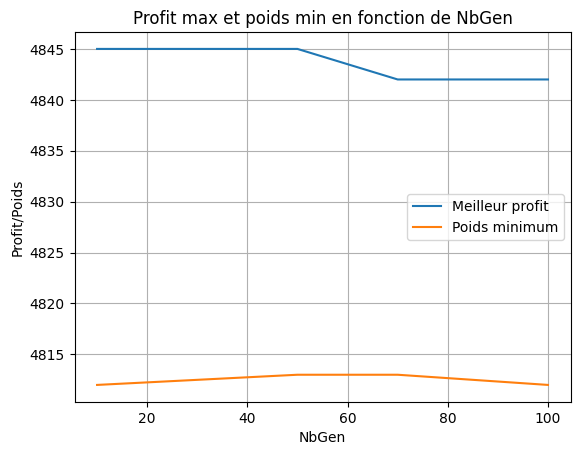

In [ ]:
z = nbGen_list
z1 = [max_profits_nbGen[i] for i in z]
z2 = [min_weights_nbGen[i] for i in z]

plt.plot(z, z1, label='Meilleur profit')
plt.plot(z, z2, label='Poids minimum')
plt.xlabel('NbGen')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de NbGen')
plt.legend()
plt.grid()
plt.show()

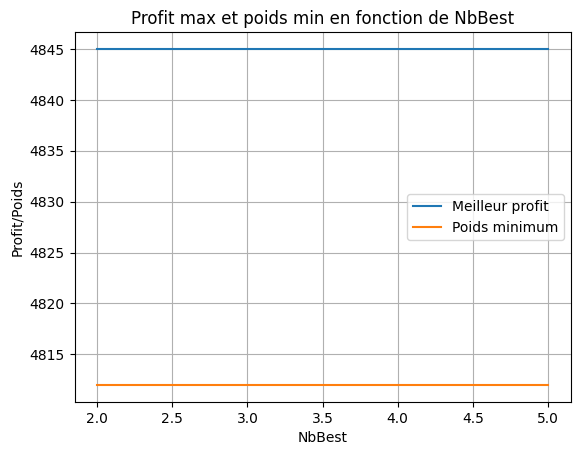

In [ ]:
k = nbBest_list
k1 = [max_profits_nbBest[i] for i in k]
k2 = [min_weights_nbBest[i] for i in k]

plt.plot(k, k1, label='Meilleur profit')
plt.plot(k, k2, label='Poids minimum')
plt.xlabel('NbBest')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de NbBest')
plt.legend()
plt.grid()
plt.show()

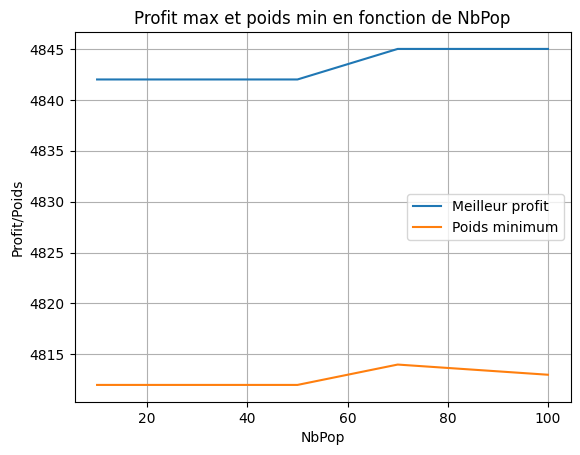

In [ ]:
x = nbPop_list
x1 = [max_profits_nbPop[i] for i in x]
x2 = [min_weights_nbPop[i] for i in x]

plt.plot(x, x1, label='Meilleur profit')
plt.plot(x, x2, label='Poids minimum')
plt.xlabel('NbPop')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de NbPop')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def find_optimal_solution(nbPop_list, nbGen_list, probaCross_list, nbBest_list, optimal_solution):

    filenames = []
    for nbPop in nbPop_list:
        for nbGen in nbGen_list:
          for probaCross in probaCross_list:
            for nbBest in nbBest_list:
                filename = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000_15.csv"
                if os.path.exists(filename):
                    try:
                        df = pd.read_csv(filename)
                        if optimal_solution in df["Nouvelle solution"].values:
                            filenames.append(filename)
                    except pd.errors.ParserError:
                        print(f"Warning: Could not parse file {filename}. Skipping.")
                else:
                    print(f"Fichier manquant: {filename}")

    return filenames


In [ ]:
def find_files_with_profit_and_weight(target_profit, target_weight, dossier="Resultats"):
    filenames = []

    for filename in os.listdir(dossier):
        if filename.startswith("NbPop") and filename.endswith(".csv"):
            filepath = os.path.join(dossier, filename)
            try:
                df = pd.read_csv(filepath)

                if 'Nouveau profit' in df.columns and 'Nouveau Poids' in df.columns:
                    condition = (df['Nouveau profit'] == target_profit) & (df['Nouveau Poids'] == target_weight)
                    if any(condition):
                        filenames.append(filename)
            except Exception as e:
                print(f"Erreur avec le fichier {filename}: {e}")

    return filenames


In [ ]:
fichier_optimal = find_optimal_solution(nbPop_list, nbGen_list, probaCross_list, nbBest_list, best_solution_str)
for f in fichier_optimal:
  print(f) #aucun fichier contient la solution optimale en termes de choix d'objets

In [ ]:
print(target_profit)
print(target_weight)
found_files = find_files_with_profit_and_weight(target_profit, target_weight)
for f in found_files:
  print(f)

NbPop20_NbGen100_ProbaCross0.2_NbBest2_resultats_algo_genetique100.csv
NbPop5_NbGen10_ProbaCross0.3_NbBest5_resultats_algo_genetique100.csv
NbPop5_NbGen10_ProbaCross0.7_NbBest5_resultats_algo_genetique100.csv
NbPop70_NbGen10_ProbaCross0.4_NbBest2_resultats_algo_genetique100.csv
NbPop10_NbGen70_ProbaCross0.5_NbBest5_resultats_algo_genetique100.csv
NbPop50_NbGen10_ProbaCross0.5_NbBest2_resultats_algo_genetique100.csv
NbPop50_NbGen5_ProbaCross0.2_NbBest2_resultats_algo_genetique100.csv
NbPop10_NbGen5_ProbaCross0.4_NbBest5_resultats_algo_genetique100.csv
NbPop20_NbGen10_ProbaCross0.2_NbBest5_resultats_algo_genetique100.csv
NbPop70_NbGen70_ProbaCross0.2_NbBest5_resultats_algo_genetique100.csv
NbPop70_NbGen20_ProbaCross0.5_NbBest5_resultats_algo_genetique100.csv
NbPop50_NbGen5_ProbaCross0.9_NbBest5_resultats_algo_genetique100.csv
NbPop70_NbGen20_ProbaCross0.6_NbBest2_resultats_algo_genetique100.csv
NbPop70_NbGen50_ProbaCross0.6_NbBest5_resultats_algo_genetique100.csv
NbPop100_NbGen100_ProbaC

A executer si le code precedent donne un resultat

In [ ]:
def analyze_files(found_files):
    nbPop_counts = {}
    nbGen_counts = {}
    probaCross_counts = {}
    nbBest_counts = {}

    for file in found_files:
      try:
          df = pd.read_csv(file)

          parts = file.split("_")

          pop_str = parts[0].split("NbPop")[1]
          nbPop_counts[int(pop_str)] = nbPop_counts.get(int(pop_str), 0) + 1

          gen_str = parts[1].split("NbGen")[1]
          nbGen_counts[int(gen_str)] = nbGen_counts.get(int(gen_str), 0) + 1

          probaCross_str = parts[2].split("ProbaCross")[1]
          probaCross_counts[float(probaCross_str)] = probaCross_counts.get(float(probaCross_str), 0) + 1

          best_str = parts[3].split("NbBest")[1]
          nbBest_counts[int(best_str)] = nbBest_counts.get(int(best_str), 0) + 1
      except pd.errors.ParserError:
          print(f"Fichier {file} non retrouve.")

    return nbPop_counts, nbGen_counts, probaCross_counts, nbBest_counts

In [ ]:
nbPop_dict, nbGen_dict, probaCross_dict, nbBest_dict = analyze_files(found_files)
print(nbPop_dict)
print(nbGen_dict)
print(probaCross_dict)
print(nbBest_dict)

max_nbPop = max(nbPop_dict, key=nbPop_dict.get)
print("Le nombre de population optimal est:", max_nbPop)
max_nbGen = max(nbGen_dict, key=nbGen_dict.get)
print("Le nombre de génération optimal est:", max_nbGen)
max_probaCross = max(probaCross_dict, key=probaCross_dict.get)
print("La probabilité de croisement optimale est:", max_probaCross)
max_nbBest = max(nbBest_dict, key=nbBest_dict.get)
print("Le nombre de meilleures solutions optimal est:", max_nbBest)

NameError: name 'analyze_files' is not defined

### Pi-15: n=10 000

In [ ]:
file_pi15_n10000 = "pi-15-10000-1000-001.kna"

def extract_data(file_path):
  with open(file_path, 'r') as f:
      content = f.readlines()
      profit = []
      weight = []
      for i in range(7, len(content)):
        profit.append(content[i].split(" ")[1])
        weight.append(content[i].split(" ")[2].split("\n")[0])
  return profit, weight

In [ ]:
profits_pi15_n10000, weights_pi15_n10000 = extract_data(file_pi15_n10000)
profits_pi15_n10000 = [int(i) for i in profits_pi15_n10000]
weights_pi15_n10000 = [int(i) for i in weights_pi15_n10000]
print(profits_pi15_n10000)
print(weights_pi15_n10000)

[96, 507, 417, 993, 651, 237, 459, 816, 447, 423, 792, 360, 669, 600, 9, 546, 336, 768, 996, 894, 633, 132, 429, 702, 618, 876, 720, 420, 795, 198, 999, 117, 909, 540, 708, 570, 537, 933, 726, 489, 774, 513, 81, 945, 60, 303, 765, 537, 726, 789, 480, 144, 339, 642, 198, 495, 66, 825, 210, 711, 801, 315, 291, 402, 468, 690, 834, 225, 246, 849, 114, 381, 363, 66, 486, 687, 288, 891, 24, 492, 891, 90, 183, 216, 18, 474, 420, 420, 357, 684, 306, 201, 387, 954, 501, 195, 738, 324, 993, 225, 261, 99, 210, 651, 921, 63, 960, 804, 519, 429, 537, 348, 153, 972, 663, 198, 93, 531, 126, 747, 471, 771, 936, 723, 897, 570, 174, 960, 384, 309, 972, 585, 48, 930, 570, 3, 21, 609, 888, 825, 930, 906, 243, 381, 378, 963, 891, 444, 216, 339, 162, 408, 159, 33, 204, 420, 153, 426, 333, 567, 840, 9, 918, 534, 234, 957, 591, 576, 747, 378, 858, 87, 435, 558, 279, 840, 735, 576, 126, 912, 741, 822, 627, 918, 201, 993, 150, 54, 759, 267, 258, 783, 117, 516, 180, 27, 381, 714, 267, 216, 450, 543, 666, 954, 72

In [ ]:
def extract_info(file_path):
  with open(file_path, 'r') as f:
      content = f.readlines()
      content_line4 = content[3].split("NB_ITEMS: ")
      nb_items = content_line4[1].split("\n")[0]
      content_line5 = content[4].split("MAX_CAPACITY: ")
      max_capacity = content_line5[1].split("\n")[0]
      max_capacity = int(max_capacity)


  return int(nb_items), int(max_capacity)

In [ ]:
nb_items_pi15_n10000, max_capacity_pi15_n10000 = extract_info(file_pi15_n10000)
print(nb_items_pi15_n10000)
print(max_capacity_pi15_n10000)

10000
49297


In [ ]:
def calculate_profit(
    solution: str,
    profits: list
  ):

  profit = 0
  for i in range(len(solution)):
    if solution[i] == "1":
      profit += int(profits[i])

  return profit

In [ ]:
def calculate_weight(
    solution: str,
    weights: list
  ):

  weight = 0
  for i in range(len(solution)):
    if solution[i] == "1":
      weight += int(weights[i])

  return weight

#### Création d'une solution valide (pas forcément optimale):
-->Ajouter des items aléatoirement dans le sac à dos jusqu'à arriver au poids maximal.

In [ ]:
import random

def gen_valid_solution(max_capacity, weights, nb_items):
    sol = []  #liste pour stocker la solution binaire
    current_capacity = 0

    for i in range(nb_items):
        if current_capacity >= max_capacity:
            sol.append("0")  # Si on atteint la limite, on met "0"
        else:
            bit = random.choice(["0", "1"])
            if bit == "1" and current_capacity + weights[i] > max_capacity:
                bit = "0"  # On force un "0" si ajouter 1 dépasse la capacité
            sol.append(bit)
            if bit == "1":
                current_capacity += weights[i]  # Mise à jour du poids

    return "".join(sol)


In [ ]:
print("Poids à ne pas dépasser: ",max_capacity_pi15_n10000)
a_solution = gen_valid_solution(max_capacity_pi15_n10000, weights_pi15_n10000, nb_items_pi15_n10000)
print("Une solution valide est: ", a_solution)
print("Le profit de cette solution est: ", calculate_profit(a_solution, profits_pi15_n10000))
print("Le poids total de cette solution est: ", calculate_weight(a_solution, weights_pi15_n10000))

Poids à ne pas dépasser:  49297
Une solution valide est:  110110010100001010110011001000101110010000110111110001011110010110000110010110011000100110100010101000001010000010010110100010011101001011011011000010100010000000101111101101011111111001001000000100000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000100000000000000000000000000100000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

#### La solution optimale avec un solver

In [223]:
from ortools.linear_solver import pywraplp
import numpy as np
import time

def solve_knapsack(profits, weights, capacity_max):

    solver = pywraplp.Solver.CreateSolver('SCIP')
    if not solver:
        print("Solveur non disponible.")
        return None, None

    n = len(profits)

    x = [solver.BoolVar(f'x_{i}') for i in range(n)]

    # Ajout de la contrainte de capacité
    solver.Add(solver.Sum(weights[i] * x[i] for i in range(n)) <= capacity_max)

    # Définition de la fonction objectif : Maximiser le profit total
    solver.Maximize(solver.Sum(profits[i] * x[i] for i in range(n)))

    # Résolution du problème
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        # Extraction de la solution optimale
        best_solution = [int(x[i].solution_value()) for i in range(n)]
        best_profit = solver.Objective().Value()
        return best_solution, best_profit
    else:
        print("Aucune solution optimale trouvée.")
        return None, None
time1 = time.time()

best_solution, best_profit = solve_knapsack(profits_pi15_n10000, weights_pi15_n10000, max_capacity_pi15_n10000)

target_profit = best_profit
target_weight = sum(weights_pi15_n10000[i] for i in range(len(best_solution)) if best_solution[i] == 1)
if best_solution:
    print("Meilleure solution trouvée :", best_solution)
    print("Meilleur profit :", target_profit)
    print("Poids atteint :", target_weight)


indice = np.where(np.array(best_solution) == 1)[0]
print(indice)
time2 = time.time()
temps_exec10000 = time2 - time1
temps_solver.append(temps_exec10000)
print("Temps d'exécution : ", temps_exec10000)
print(temps_solver)

Meilleure solution trouvée : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0

In [ ]:
best_solution_str = "".join(map(str, best_solution))
print("Meilleure solution trouvée (string):", best_solution_str)

Meilleure solution trouvée (string): 100000000000001000000000000000000000000000001000000100000000000000000000010000100000100000000000000001000000000000001000000000000000000010000000000000000100000000000000000000000000000000010000000100000000000000010000000000000100000000000001000100000001000000000000000000000000000000000001000100100010001100000000000000000100000101010000000000000000000000000000100000000000000000100001000000000000000100000000000000001000000001010000000000000000000100100000000010001000000000000001000000000000000000000001000000000000000000000000000000000000000000001000001100010000000000100000000100000000000001000000001000000000000000000000000000000100100000010010000000000000000000000000100100000000100000001000000000000000000000000001001001000001010100000000010000000000000000000000000000000100100000000000000000010010000110010000101000000000100000000001100000000000000000000000011000000000000100000000000000000000001000000000000000000000000000100000001000000000000000000000000

#### Métaheuristique 1 - Recuit simulé

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

def simulated_annealing(
    initial_solution: str,
    max_capacity: int,
    profits: list,
    weights: list,
    temperature: float,
    cooling_rate: float,
):
    current_solution = initial_solution
    current_profit = calculate_profit(current_solution, profits)
    current_weight = calculate_weight(current_solution, weights)

    best_solution = current_solution
    best_profit = current_profit

    iteration = 0

    # Listes pour stocker les valeurs à chaque itération
    profits_list = []
    weights_list = []

    while temperature > 1:
        iteration += 1

        # Générer un voisin valide (ne dépassant pas max_capacity)
        while True:
            neighbor = generate_single_neighbor(current_solution)
            neighbor_profit = calculate_profit(neighbor, profits)
            neighbor_weight = calculate_weight(neighbor, weights)

            if neighbor_weight <= max_capacity:
                break  # On garde ce voisin valide

        delta = neighbor_profit - current_profit

        if delta > 0:
            current_solution = neighbor
            current_profit = neighbor_profit
            if neighbor_profit > best_profit:
                best_solution = neighbor
                best_profit = neighbor_profit
        else:
            probability = np.exp(delta / temperature)
            if random.uniform(0, 1) < probability:
                current_solution = neighbor
                current_profit = neighbor_profit

        # Ajouter les valeurs actuelles de profit et poids dans les listes
        profits_list.append(current_profit)
        weights_list.append(current_weight)

        # Réduction progressive de la température
        temperature *= cooling_rate

    # Tracer l'évolution du profit et du poids
    plt.figure(figsize=(12, 6))

    # Tracer du profit au fil des itérations
    plt.subplot(1, 2, 1)
    plt.plot(profits_list, label='Profit', color='blue')
    plt.title('Évolution du profit au fil des itérations')
    plt.xlabel('Itérations')
    plt.ylabel('Profit')
    plt.grid(True)

    # Tracer du poids au fil des itérations
    plt.subplot(1, 2, 2)
    plt.plot(weights_list, label='Poids', color='red')
    plt.title('Évolution du poids au fil des itérations')
    plt.xlabel('Itérations')
    plt.ylabel('Poids')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return best_solution, best_profit, iteration


Poids à ne pas dépasser: 49297
Solution initiale choisie aléatoirement:  001111100111110001100000001011111011100001011010001100111110100110000101000101000100100111100000011111100110100101001001100100011111111000110101111000111110000101111101000011010110001010110000000100000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

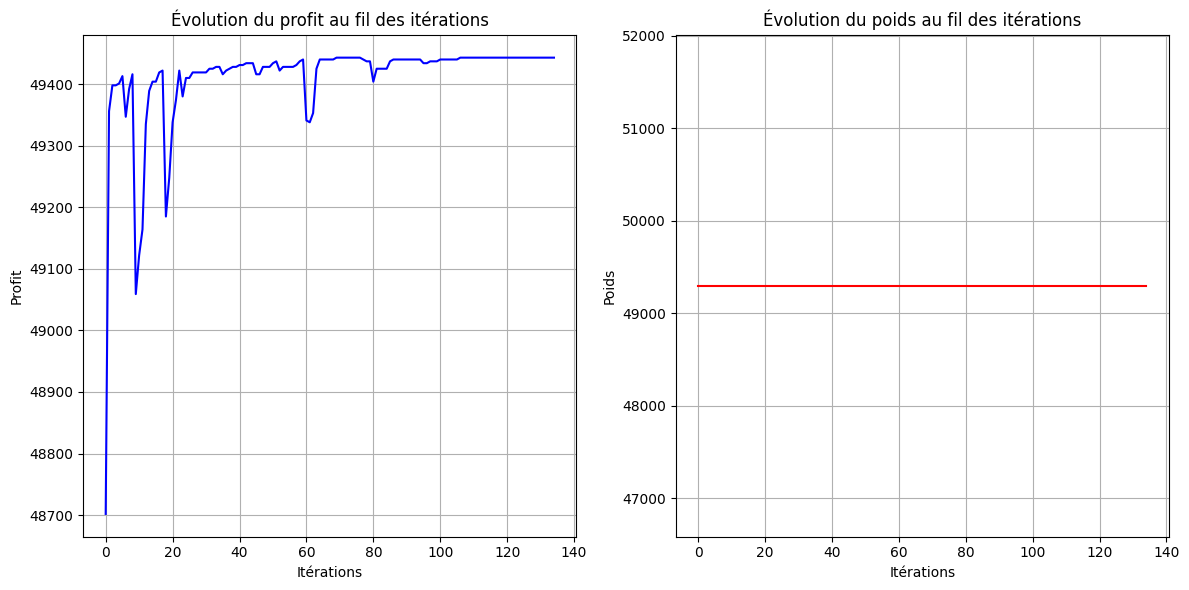

Meilleure solution trouvée : 00111010011111000110000000101111100110000101101000110011011010011000010100010100010000010110000001111010011010010100100110010001111111100011010111100011111000010111110100001101011000101011000000010000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [ ]:
# Test du recuit simulé

print("Poids à ne pas dépasser:", max_capacity_pi15_n10000)
initial_solution = gen_valid_solution(max_capacity_pi15_n10000, weights_pi15_n10000, nb_items_pi15_n10000)

print("Solution initiale choisie aléatoirement: ",initial_solution)
print("Son profit actuel:",calculate_profit(initial_solution, profits_pi15_n10000))
print("Son poids actuel:",calculate_weight(initial_solution, weights_pi15_n10000))
print()

temperature = 1000
cooling_rate = 0.95

best_sol, best_prof, iterations = simulated_annealing(initial_solution, max_capacity_pi15_n10000, profits_pi15_n10000, weights_pi15_n10000, temperature, cooling_rate)
print("Meilleure solution trouvée :", best_sol)
print("Meilleur profit :", best_prof)
print("Poids atteind :", calculate_weight(best_sol, weights_pi15_n10000))
print(f"Solution trouvée en {iterations} itérations")


#### Tests


In [ ]:
import pandas as pd
import time

def test_recuit_simule(temperature, cooling_rate, max_capacity, profits, weights, nb_items):
    results = []

    # Générer une solution initiale valide
    initial_solution = gen_valid_solution(max_capacity, weights, nb_items)
    initial_profit = calculate_profit(initial_solution, profits)
    initial_weight = calculate_weight(initial_solution, weights)

    # Démarrer le chronomètre
    start_time = time.time()

    # Appliquer le recuit simulé
    best_solution, best_profit, iterations = simulated_annealing(
        initial_solution, max_capacity, profits, weights, temperature, cooling_rate
    )

    # Arrêter le chronomètre
    end_time = time.time()
    execution_time = end_time - start_time  # Temps en secondes

    best_weight = calculate_weight(best_solution, weights)
    nb_objects = 0
    for i in range(len(best_solution)):
      if best_solution[i] == "1":
        nb_objects += 1

    # Enregistrement des résultats
    results.append({
        "Solution initiale": initial_solution,
        "Profit initial": initial_profit,
        "Poids initial": initial_weight,
        "Temperature": temperature,
        "Cooling Rate": cooling_rate,
        "Nouvelle solution": best_solution,
        "Nouveau profit": best_profit,
        "Nouveau Poids": best_weight,
        "Nb Itérations": iterations,
        "Nb objets": nb_objects,
        "Temps (s)": execution_time
    })

    # Convertir en DataFrame pandas
    df = pd.DataFrame(results)

    return df

In [ ]:
temperatures = [100, 200, 500, 700, 1000, 2000, 5000, 7000, 10000]
cooling_rates = [round(0.85 + i * 0.01, 2) for i in range(15)] # pour [0.85, 0.86, ..., 0.99]

'''for temperature in temperatures:
    for cooling_rate in cooling_rates:
        print(f"Temp {temperature}\nCooling rate {cooling_rate}")
        test = test_recuit_simule(temperature, cooling_rate, max_capacity_pi15_n10000, profits_pi15_n10000, weights_pi15_n10000, nb_items_pi15_n10000)
        test.to_csv(f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule{nb_items_pi15_n10000}_15.csv", index=False)
'''

'for temperature in temperatures:\n    for cooling_rate in cooling_rates:\n        print(f"Temp {temperature}\nCooling rate {cooling_rate}")\n        test = test_recuit_simule(temperature, cooling_rate, max_capacity_pi15_n10000, profits_pi15_n10000, weights_pi15_n10000, nb_items_pi15_n10000)\n        test.to_csv(f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule{nb_items_pi15_n10000}_15.csv", index=False)\n'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_profit_from_temp(temperatures, cooling_rates):
    max_profits = {}

    for temperature in temperatures:
        max_profit = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_profit = max(max_profit, df["Nouveau profit"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_profits[temperature] = max_profit

    return max_profits


In [ ]:
import pandas as pd
import os

def extract_max_profit_from_CR(temperatures, cooling_rates):
    max_profits = {}

    for cooling_rate in cooling_rates:
        max_profit = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nouveau profit"].max()
                max_profit = max(max_profit, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        max_profits[cooling_rate] = max_profit if max_profit != float('-inf') else None

    return max_profits


In [ ]:
max_profits_temp = extract_max_profit_from_temp(temperatures, cooling_rates)
print(max_profits_temp)

{100: np.int64(49431), 200: np.int64(49449), 500: np.int64(49476), 700: np.int64(49497), 1000: np.int64(49476), 2000: np.int64(49518), 5000: np.int64(49569), 7000: np.int64(49566), 10000: np.int64(49539)}


In [ ]:
max_profits_CR = extract_max_profit_from_CR(temperatures, cooling_rates)
print(max_profits_CR)

{0.85: np.int64(49425), 0.86: np.int64(49449), 0.87: np.int64(49434), 0.88: np.int64(49431), 0.89: np.int64(49440), 0.9: np.int64(49437), 0.91: np.int64(49437), 0.92: np.int64(49458), 0.93: np.int64(49455), 0.94: np.int64(49437), 0.95: np.int64(49455), 0.96: np.int64(49464), 0.97: np.int64(49485), 0.98: np.int64(49521), 0.99: np.int64(49569)}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_min_weight_from_temp(temperatures, cooling_rates):
    min_weights = {}

    for temperature in temperatures:
        min_weight = float('inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                min_weight = min(min_weight, df["Nouveau Poids"].min())
            else:
                print(f"Warning: File {file_name} not found.")

        min_weights[temperature] = min_weight

    return min_weights

In [ ]:
def extract_min_weight_from_CR(temperatures, cooling_rates):
    min_weights = {}

    for cooling_rate in cooling_rates:
        min_weight = float('inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                min_weight = min(min_weight, df["Nouveau Poids"].min())
            else:
                print(f"Fichier manquant: {file_name}")

        min_weights[cooling_rate] = min_weight

    return min_weights


In [ ]:
min_weights_temp = extract_min_weight_from_temp(temperatures, cooling_rates)
print(min_weights_temp)

{100: np.int64(49297), 200: np.int64(49296), 500: np.int64(49296), 700: np.int64(49296), 1000: np.int64(49295), 2000: np.int64(49295), 5000: np.int64(49295), 7000: np.int64(49296), 10000: np.int64(49296)}


In [ ]:
min_weights_CR = extract_min_weight_from_CR(temperatures, cooling_rates)
print(min_weights_CR)

{0.85: np.int64(49297), 0.86: np.int64(49296), 0.87: np.int64(49295), 0.88: np.int64(49296), 0.89: np.int64(49297), 0.9: np.int64(49296), 0.91: np.int64(49296), 0.92: np.int64(49296), 0.93: np.int64(49296), 0.94: np.int64(49297), 0.95: np.int64(49295), 0.96: np.int64(49295), 0.97: np.int64(49296), 0.98: np.int64(49297), 0.99: np.int64(49295)}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_min_object_from_temp(temperatures, cooling_rates):
    min_objects = {}

    for temperature in temperatures:
        min_object = float('inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                min_object = min(min_object, df["Nb objets"].min())
            else:
                print(f"Fichier manquant: {file_name}")

        min_objects[temperature] = min_object

    return min_objects

In [ ]:
import pandas as pd
import os

def extract_min_object_from_CR(temperatures, cooling_rates):
    min_objects = {}

    for cooling_rate in cooling_rates:
        min_object = float('inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_min = df["Nb objets"].min()
                min_object = min(min_object, current_min)
            else:
                print(f"Fichier manquant: {file_name}")

        if min_object != float('inf'):
            min_objects[cooling_rate] = min_object
        else:
            min_objects[cooling_rate] = None

    return min_objects


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_object_from_temp(temperatures, cooling_rates):
    max_objects = {}

    for temperature in temperatures:
        max_object = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_object = max(max_object, df["Nb objets"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_objects[temperature] = max_object

    return max_objects

In [ ]:
import pandas as pd
import os

def extract_max_object_from_CR(temperatures, cooling_rates):
    max_objects = {}

    for cooling_rate in cooling_rates:
        max_object = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nb objets"].max()
                max_object = max(max_object, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_object != float('-inf'):
            max_objects[cooling_rate] = max_object
        else:
            max_objects[cooling_rate] = None

    return max_objects


In [ ]:
max_objects_temp = extract_max_object_from_temp(temperatures, cooling_rates)
print(max_objects_temp)
min_objects_temp = extract_min_object_from_temp(temperatures, cooling_rates)
print(min_objects_temp)

{100: 6, 200: 7, 500: 6, 700: 6, 1000: 4, 2000: 6, 5000: 6, 7000: 5, 10000: 6}
{100: 2, 200: 2, 500: 2, 700: 2, 1000: 2, 2000: 2, 5000: 2, 7000: 2, 10000: 2}


In [ ]:
max_objects_CR = extract_max_object_from_CR(temperatures, cooling_rates)
print(max_objects_CR)
min_objects_CR = extract_min_object_from_CR(temperatures, cooling_rates)
print(min_objects_CR)

{0.85: 5, 0.86: 4, 0.87: 6, 0.88: 5, 0.89: 5, 0.9: 5, 0.91: 5, 0.92: 3, 0.93: 6, 0.94: 4, 0.95: 6, 0.96: 4, 0.97: 5, 0.98: 6, 0.99: 7}
{0.85: 2, 0.86: 2, 0.87: 2, 0.88: 3, 0.89: 3, 0.9: 3, 0.91: 2, 0.92: 2, 0.93: 2, 0.94: 2, 0.95: 2, 0.96: 2, 0.97: 2, 0.98: 3, 0.99: 2}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_iterations_from_temp(temperatures, cooling_rates):
    max_iterations = {}

    for temperature in temperatures:
        max_iteration = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_iteration = max(max_iteration, df["Nb Itérations"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_iterations[temperature] = max_iteration

    return max_iterations

In [ ]:
import pandas as pd
import os

def extract_max_iterations_from_CR(temperatures, cooling_rates):
    max_iterations = {}

    for cooling_rate in cooling_rates:
        max_iteration = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nb Itérations"].max()
                max_iteration = max(max_iteration, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_iteration != float('-inf'):
            max_iterations[cooling_rate] = max_iteration
        else:
            max_iterations[cooling_rate] = None

    return max_iterations


In [ ]:
max_iterations_temp = extract_max_iterations_from_temp(temperatures, cooling_rates)
print(max_iterations_temp)

{100: 459, 200: 528, 500: 619, 700: 652, 1000: 688, 2000: 757, 5000: 848, 7000: 881, 10000: 917}


In [ ]:
max_iterations_CR = extract_max_iterations_from_CR(temperatures, cooling_rates)
print(max_iterations_CR)

{0.85: 57, 0.86: 62, 0.87: 67, 0.88: 73, 0.89: 80, 0.9: 88, 0.91: 98, 0.92: 111, 0.93: 127, 0.94: 149, 0.95: 180, 0.96: 226, 0.97: 303, 0.98: 456, 0.99: 917}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_time_from_temp(temperatures, cooling_rates):
    max_times = {}

    for temperature in temperatures:
        max_time = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_time = max(max_time, df["Temps (s)"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_times[temperature] = max_time

    return max_times

In [ ]:
import pandas as pd
import os

def extract_max_time_from_CR(temperatures, cooling_rates):
    max_times = {}

    for cooling_rate in cooling_rates:
        max_time = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_15.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Temps (s)"].max()
                max_time = max(max_time, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_time != float('-inf'):
            max_times[cooling_rate] = max_time
        else:
            max_times[cooling_rate] = None

    return max_times


In [ ]:
max_time_temp = extract_max_time_from_temp(temperatures, cooling_rates)
print(max_time_temp)

{100: 0.1891589164733886, 200: 0.0907292366027832, 500: 0.1429746150970459, 700: 0.0987663269042968, 1000: 0.2008447647094726, 2000: 0.1407692432403564, 5000: 0.1525726318359375, 7000: 0.1378517150878906, 10000: 0.1508307456970214}


In [ ]:
max_time_CR = extract_max_time_from_CR(temperatures, cooling_rates)
print(max_time_CR)

{0.85: 0.0206911563873291, 0.86: 0.0310959815979003, 0.87: 0.0151307582855224, 0.88: 0.0229430198669433, 0.89: 0.0176529884338378, 0.9: 0.0202562808990478, 0.91: 0.0309798717498779, 0.92: 0.0408122539520263, 0.93: 0.0291221141815185, 0.94: 0.0526940822601318, 0.95: 0.0425713062286376, 0.96: 0.0550315380096435, 0.97: 0.0662951469421386, 0.98: 0.0910506248474121, 0.99: 0.2008447647094726}


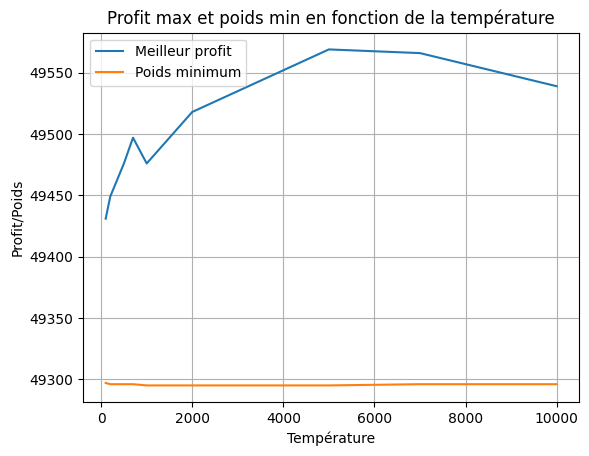

In [ ]:
# Dessiner les graphiques

x = temperatures
y1 = [max_profits_temp[temp] for temp in temperatures]
y2 = [min_weights_temp[temp] for temp in temperatures]

plt.plot(x, y1, label='Meilleur profit')
plt.plot(x, y2, label='Poids minimum')
plt.xlabel('Température')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de la température')
plt.legend()
plt.grid()
plt.show()

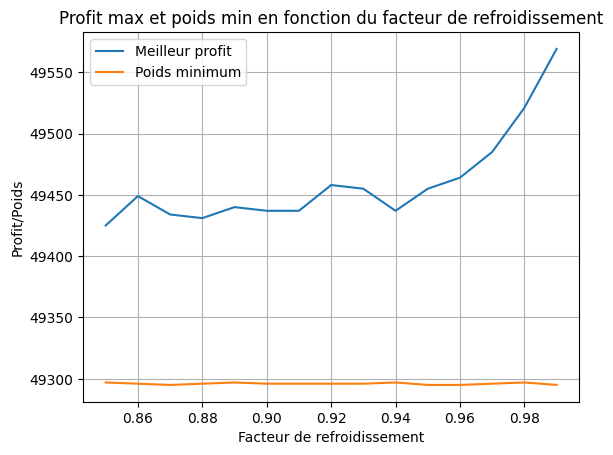

In [ ]:
z = cooling_rates
z1 = [max_profits_CR[cr] for cr in cooling_rates]
z2 = [min_weights_CR[cr] for cr in cooling_rates]

plt.plot(z, z1, label='Meilleur profit')
plt.plot(z, z2, label='Poids minimum')
plt.xlabel('Facteur de refroidissement')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction du facteur de refroidissement')
plt.legend()
plt.grid()
plt.show()

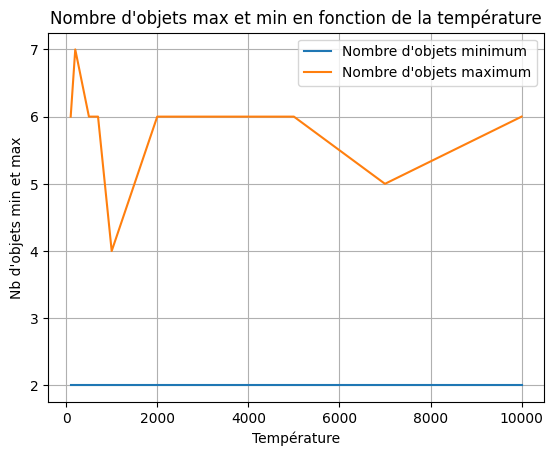

In [ ]:
y3 = [min_objects_temp[temp] for temp in temperatures]
y4 = [max_objects_temp[temp] for temp in temperatures]

plt.plot(x, y3, label='Nombre d\'objets minimum')
plt.plot(x, y4, label='Nombre d\'objets maximum')
plt.title("Nombre d'objets max et min en fonction de la température")
plt.xlabel('Température')
plt.ylabel("Nb d'objets min et max")
plt.legend()
plt.grid()
plt.show()

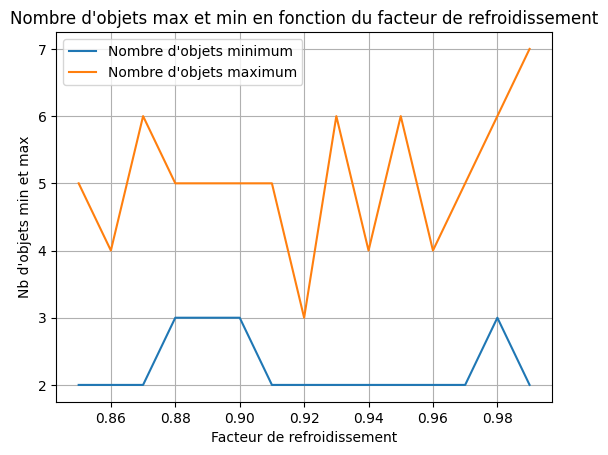

In [ ]:
z3 = [min_objects_CR[cr] for cr in cooling_rates]
z4 = [max_objects_CR[cr] for cr in cooling_rates]

plt.plot(z, z3, label='Nombre d\'objets minimum')
plt.plot(z, z4, label='Nombre d\'objets maximum')
plt.title("Nombre d'objets max et min en fonction du facteur de refroidissement")
plt.xlabel('Facteur de refroidissement')
plt.ylabel("Nb d'objets min et max")
plt.legend()
plt.grid()
plt.show()

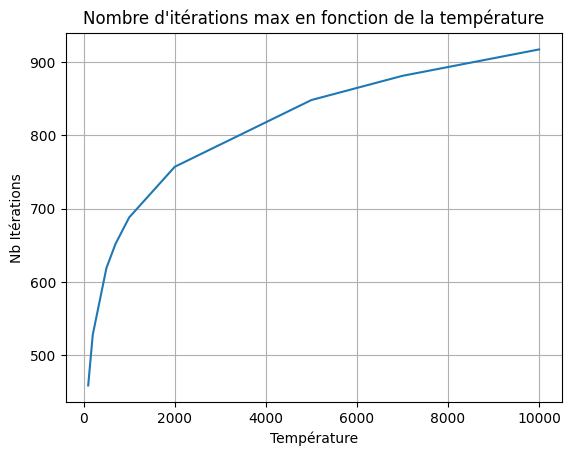

In [ ]:
y5 = [max_iterations_temp[temp] for temp in temperatures]

plt.plot(x, y5, label='Nombre d\'itérations maximum')
plt.title('Nombre d\'itérations max en fonction de la température')
plt.xlabel('Température')
plt.ylabel('Nb Itérations')
plt.grid()
plt.show()

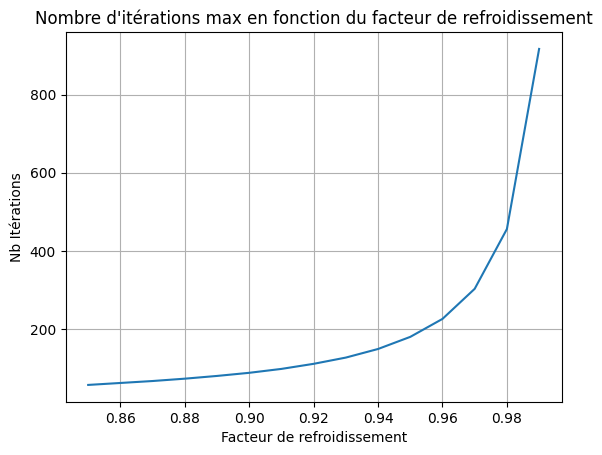

In [ ]:
z5 = [max_iterations_CR[cr] for cr in cooling_rates]

plt.plot(z, z5, label='Nombre d\'itérations maximum')
plt.title('Nombre d\'itérations max en fonction du facteur de refroidissement')
plt.xlabel('Facteur de refroidissement')
plt.ylabel('Nb Itérations')
plt.grid()
plt.show()

     Température    CR  Profit max
0            100  0.85       49422
1            100  0.86       49422
2            100  0.87       49422
3            100  0.88       49422
4            100  0.89       49422
..           ...   ...         ...
130        10000  0.95       49422
131        10000  0.96       49422
132        10000  0.97       49422
133        10000  0.98       49422
134        10000  0.99       49422

[135 rows x 3 columns]
                            OLS Regression Results                            
Dep. Variable:             Profit max   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -66.00
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               1.00
Time:                        16:35:54   Log-Likelihood:                 2980.4
No. Observations:                 135   AIC:                            -5955.
Df 

c:\Users\cerik\OneDrive\Desktop\4A INFO\Projet Knapsack\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


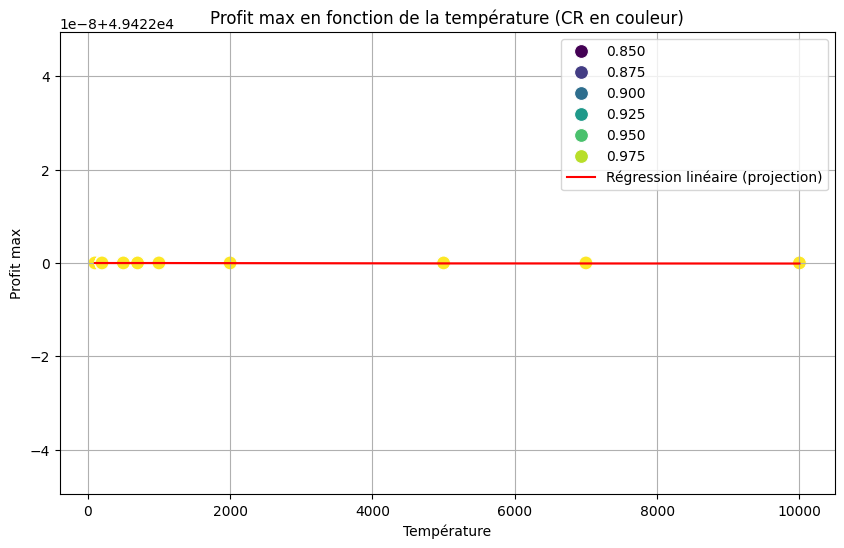

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

def collecter_donnees_recuit(temp_list, cr_list, n, fichier):
    donnees = []

    for temp in temp_list:
        for cr in cr_list:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule{n}_{fichier}.csv"
            
            if os.path.exists(file_name):
                try:
                    df = pd.read_csv(file_name)
                    if 'Nouveau profit' in df.columns:
                        profit = df['Nouveau profit'].iloc[0]
                        donnees.append({
                            "Température": temp,
                            "CR": cr,
                            "Profit max": profit
                        })
                    else:
                        print(f"'profit_final' manquant dans {file_name}")
                except Exception as e:
                    print(f"Erreur de lecture {file_name} : {e}")
            else:
                print(f"Fichier introuvable : {file_name}")

    return pd.DataFrame(donnees)

data_pi12_n100 = collecter_donnees_recuit(temperatures, cooling_rates, 10000, 15)
print(data_pi12_n100)

def tracer_regression_lineaire(df):
    X = df[["Température", "CR"]]
    y = df["Profit max"]

    X = sm.add_constant(X)

    # Régression linéaire
    model = sm.OLS(y, X).fit()
    print(model.summary())

    # Extraction des coefficients
    a = model.params["Température"]
    b = model.params["CR"]
    c = model.params["const"]

    print(f"L'équation de régression linéaire est : Profit max = {a:.4f} * Température + {b:.4f} * CR + {c:.4f}")

    y_pred = model.predict(X)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x="Température", y="Profit max", hue="CR", palette="viridis", s=100)
    sns.lineplot(x=df["Température"], y=y_pred, color="red", label="Régression linéaire (projection)")
    plt.title("Profit max en fonction de la température (CR en couleur)")
    plt.legend()
    plt.grid()
    plt.show()

tracer_regression_lineaire(data_pi12_n100)


In [ ]:
import os
import pandas as pd

def find_optimal_solution(temperatures, cooling_rates, optimal_solution):
    filenames = []
    for temp in temperatures:
        for cr in cooling_rates:
            filename = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_15.csv"
            if os.path.exists(filename):
                try:
                    df = pd.read_csv(filename)
                    if "Nouvelle solution" in df.columns:
                        if optimal_solution in df["Nouvelle solution"].values:
                            filenames.append(filename)
                except pd.errors.ParserError:
                    print(f"Warning: Could not parse file {filename}. Skipping.")
    return filenames

In [ ]:
def find_files_with_profit_and_weight(target_profit, target_weight, dossier="Resultats"):
    filenames = []
    for filename in os.listdir(dossier):
        if filename.startswith("Temp") and filename.endswith("10000_15.csv"):
            full_path = os.path.join(dossier, filename)
            try:
                df = pd.read_csv(full_path)
                if 'Nouveau profit' in df.columns and 'Nouveau Poids' in df.columns:
                    match = (df['Nouveau profit'] == target_profit) & (df['Nouveau Poids'] == target_weight)
                    if any(match):
                        filenames.append(filename)
            except pd.errors.ParserError:
                print(f"Fichier {filename} non retrouve.")
    return filenames


In [ ]:
fichier_optimal = find_optimal_solution(temperatures, cooling_rates, best_solution_str)

if len(fichier_optimal) == 0:
    print("Le recuit simulé n'a pas abouti à la solution optimale en termes de choix/répartition d'objets.")
else:
    for f in fichier_optimal:
        print(f)

Le recuit simulé n'a pas abouti à la solution optimale en termes de choix/répartition d'objets.


A éxecuter uniquement si le recuit simulé a pu donner la solution optimale 

In [ ]:
found_files = find_files_with_profit_and_weight(target_profit, target_weight)
for f in found_files:
  print(f)

In [ ]:
def analyze_files(found_files):
    temp_counts = {}
    cr_counts = {}

    for file in found_files:
        try:
            df = pd.read_csv(file)

            # Extract temperature and cooling rate from the filename
            parts = file.split("_")
            temp_str = parts[0].split("Temp")[1]
            cr_str = parts[1].split("CR")[1].split("resultats")[0]

            temperature = int(temp_str)
            cooling_rate = float(cr_str)

            # Update counts
            temp_counts[temperature] = temp_counts.get(temperature, 0) + 1
            cr_counts[cooling_rate] = cr_counts.get(cooling_rate, 0) + 1

        except FileNotFoundError:
            print(f"File not found: {file}")
        except (pd.errors.EmptyDataError, pd.errors.ParserError):
            print(f"Error reading file or empty file: {file}")
        except Exception as e:
            print(f"An unexpected error occurred with file {file}: {e}")


    return temp_counts, cr_counts

In [ ]:
temp_dict, cr_dict = analyze_files(found_files)

print("Temperature counts:", temp_dict)
print("Cooling rate counts:", cr_dict)

max_temps = max(temp_dict, key=temp_dict.get)
print("La température optimale est:", max_temps)
max_crs = max(cr_dict, key=cr_dict.get)
print("Le facteur de refroidissement optimal est:", max_crs)

Temperature counts: {700: 8, 1000: 7, 100: 5, 200: 4, 7000: 4, 500: 8, 5000: 3, 10000: 2, 2000: 2}
Cooling rate counts: {0.91: 3, 0.99: 5, 0.98: 3, 0.86: 3, 0.89: 4, 0.96: 4, 0.97: 4, 0.95: 3, 0.87: 1, 0.92: 3, 0.9: 3, 0.85: 2, 0.93: 1, 0.94: 2, 0.88: 2}
La température optimale est: 700
Le facteur de refroidissement optimal est: 0.99


#### Métaheuristique 2 - Génétique

In [ ]:
def roulette_selection(population, profits):
    # Calcul du profit total pour la population
    fitness = [calculate_profit(sol, profits) for sol in population]
    total_fitness = sum(fitness)

    # Si la fitness totale est 0, on retourne un choix aléatoire
    if total_fitness == 0:
        return random.choice(population)

    # Sélection d'un parent par roulette
    pick = random.uniform(0, total_fitness)
    current = 0
    for i, sol in enumerate(population):
        current += fitness[i]
        if current > pick:
            return sol
    return population[-1]  # Retourne le dernier si aucune sélection avant


In [ ]:
def crossover(nb_items, parent1, parent2, max_capacity, weights):
    point = random.randint(1, nb_items - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]

    # Vérification si les enfants sont valides
    if calculate_weight(child1, weights) > max_capacity:
        child1 = parent1  # Si l'enfant dépasse la capacité, on garde le parent
    if calculate_weight(child2, weights) > max_capacity:
        child2 = parent2  # Idem pour l'autre enfant

    return child1, child2


In [ ]:
def mutate(nb_items, max_capacity, weights, solution):
    sol_list = list(solution)
    index = random.randint(0, nb_items - 1)
    sol_list[index] = "1" if sol_list[index] == "0" else "0"

    # Vérification de la validité après mutation
    new_sol = "".join(sol_list)
    if calculate_weight(new_sol, weights) <= max_capacity:
        return new_sol  # Retourner la solution si elle respecte la capacité
    return solution  # Si la mutation rend la solution invalide, on garde l'ancienne solution


In [ ]:
import matplotlib.pyplot as plt

def algo_genetique(
      nb_items: int,
      max_capacity: int,
      weights: list,
      profits: list,
      nbPop: int,
      nbGen: int,
      probaCross: float,
      nbBest: int
    ):

    # Initialisation de la population
    population = [gen_valid_solution(max_capacity, weights, nb_items) for _ in range(nbPop)]
    best_solution = max(population, key=lambda sol: calculate_profit(sol, profits))
    best_profit = calculate_profit(best_solution, profits)

    # Pour le graphique
    evolution_profits = []
    evolution_weights = []

    for generation in range(nbGen):
        new_population = []

        # Sélection et reproduction
        for _ in range(nbPop):
            parent1 = roulette_selection(population, profits)
            parent2 = roulette_selection(population, profits)

            # Croisement ou mutation
            if random.random() < probaCross:
                child1, child2 = crossover(nb_items, parent1, parent2, max_capacity, weights)
            else:
                child1 = mutate(nb_items, max_capacity, weights, parent1)
                child2 = mutate(nb_items, max_capacity, weights, parent2)

            new_population.append(child1)
            new_population.append(child2)

        # Garder les meilleures solutions
        population = sorted(new_population, key=lambda sol: calculate_profit(sol, profits), reverse=True)[:nbPop]

        # Meilleure solution actuelle
        current_best_solution = population[0]
        current_best_profit = calculate_profit(current_best_solution, profits)
        current_best_weight = calculate_weight(current_best_solution, weights)

        # Enregistrer l’évolution
        evolution_profits.append(current_best_profit)
        evolution_weights.append(current_best_weight)

        # Mettre à jour la meilleure globale
        if current_best_profit > best_profit:
            best_solution = current_best_solution
            best_profit = current_best_profit

    # Tracer l'évolution du profit et du poids
    '''plt.figure(figsize=(12, 6))

    # Tracer du profit au fil des itérations
    plt.subplot(1, 2, 1)
    plt.plot(evolution_profits, label='Profit', color='blue')
    plt.title('Évolution du profit au fil des itérations')
    plt.xlabel('Itérations')
    plt.ylabel('Profit')
    plt.grid(True)

    # Tracer du poids au fil des itérations
    plt.subplot(1, 2, 2)
    plt.plot(evolution_weights, label='Poids', color='red')
    plt.title('Évolution du poids au fil des itérations')
    plt.xlabel('Itérations')
    plt.ylabel('Poids')
    plt.grid(True)

    plt.tight_layout()
    plt.show()'''

    return best_solution, best_profit


In [ ]:
nbPop = 10  # Taille de la population
nbGen = 100  # Nombre de générations
probaCross = 0.7  # Probabilité de croisement
nbBest = 2  # Nombre de meilleures solutions conservées

best_solution, best_profit = algo_genetique(nb_items_pi15_n10000, max_capacity_pi15_n10000, weights_pi15_n10000, profits_pi15_n10000, nbPop, nbGen, probaCross, nbBest)
print("Meilleure solution trouvée :", best_solution)
print("Meilleur profit :", best_profit)
print("Poids atteind :", calculate_weight(best_solution, weights_pi15_n10000))

Meilleure solution trouvée : 11111000001101011110100011001000101110000010000010110101001010011101110011011001101001110111100101000011110111100010110110001111011000110010110010010111100010110111111010110001001100001000000000010000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000100000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

#### Tests

In [ ]:
import pandas as pd
import time
import os

def test_algo_genetique(nb_items, max_capacity, weights, profits, nbPop, nbGen, probaCross, nbBest):
                    results = []
                    
                    # Générer une solution initiale valide
                    initial_solution = gen_valid_solution(max_capacity, weights, nb_items)
                    initial_profit = calculate_profit(initial_solution, profits)
                    initial_weight = calculate_weight(initial_solution, weights)

                    # Démarrer le chronomètre
                    start_time = time.time()

                    # Exécuter l'algorithme génétique
                    best_solution, best_profit = algo_genetique(
                        nb_items, max_capacity, weights, profits, nbPop, nbGen, probaCross, nbBest
                    )

                    # Arrêter le chronomètre
                    end_time = time.time()
                    execution_time = end_time - start_time  # Temps en secondes

                    # Calculer le poids et le nombre d'objets de la meilleure solution
                    best_weight = calculate_weight(best_solution, weights)
                    nb_objects = sum(1 for i in range(len(best_solution)) if best_solution[i] == "1")

                    # Enregistrement des résultats
                    results.append({
                        "Solution initiale": initial_solution,
                        "Profit initial": initial_profit,
                        "Poids initial": initial_weight,
                        "NbPop": nbPop,
                        "NbGen": nbGen,
                        "ProbaCross": probaCross,
                        "NbBest": nbBest,
                        "Nouvelle solution": best_solution,
                        "Nouveau profit": best_profit,
                        "Nouveau Poids": best_weight,
                        "Nb objets": nb_objects,
                        "Temps (s)": execution_time
                    })

                    # Convertir en DataFrame et sauvegarder le fichier
                    df = pd.DataFrame(results)
                    return df
                


In [ ]:
# Fixer un interval pour les paramètres

nbPop_list = [10, 50, 70, 100]
nbGen_list = [10, 50, 70, 100]
probaCross_list = [0.1, 0.5, 0.9]
nbBest_list = [2, 5]

# Code pour effectuer les tests, attention, une fois lancé, il prend ~250 minutes pour s'executer
'''for nbPop in nbPop_list:
    for nbGen in nbGen_list:
        for probaCross in probaCross_list:
            for nbBest in nbBest_list:
                print(f"NbPop {nbPop}\nNbGen {nbGen}\nProbaCross {probaCross}\nNbBest {nbBest}")
                test = test_algo_genetique(nb_items_pi15_n10000, max_capacity_pi15_n10000, weights_pi15_n10000, profits_pi15_n10000, nbPop, nbGen, probaCross, nbBest)
                test.to_csv(f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000_15.csv", index=False)
'''

NbPop 10
NbGen 10
ProbaCross 0.1
NbBest 2
NbPop 10
NbGen 10
ProbaCross 0.1
NbBest 5
NbPop 10
NbGen 10
ProbaCross 0.5
NbBest 2
NbPop 10
NbGen 10
ProbaCross 0.5
NbBest 5
NbPop 10
NbGen 10
ProbaCross 0.9
NbBest 2
NbPop 10
NbGen 10
ProbaCross 0.9
NbBest 5
NbPop 10
NbGen 50
ProbaCross 0.1
NbBest 2
NbPop 10
NbGen 50
ProbaCross 0.1
NbBest 5
NbPop 10
NbGen 50
ProbaCross 0.5
NbBest 2
NbPop 10
NbGen 50
ProbaCross 0.5
NbBest 5
NbPop 10
NbGen 50
ProbaCross 0.9
NbBest 2
NbPop 10
NbGen 50
ProbaCross 0.9
NbBest 5
NbPop 10
NbGen 70
ProbaCross 0.1
NbBest 2
NbPop 10
NbGen 70
ProbaCross 0.1
NbBest 5
NbPop 10
NbGen 70
ProbaCross 0.5
NbBest 2
NbPop 10
NbGen 70
ProbaCross 0.5
NbBest 5
NbPop 10
NbGen 70
ProbaCross 0.9
NbBest 2
NbPop 10
NbGen 70
ProbaCross 0.9
NbBest 5
NbPop 10
NbGen 100
ProbaCross 0.1
NbBest 2
NbPop 10
NbGen 100
ProbaCross 0.1
NbBest 5
NbPop 10
NbGen 100
ProbaCross 0.5
NbBest 2
NbPop 10
NbGen 100
ProbaCross 0.5
NbBest 5
NbPop 10
NbGen 100
ProbaCross 0.9
NbBest 2
NbPop 10
NbGen 100
ProbaCross

In [ ]:
def extract_max_profit_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for probaCross in probaCross_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000_15.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[probaCross] = max_profit

    return max_profits

In [ ]:
def extract_min_weight_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for probaCross in probaCross_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000_15.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[probaCross] = min_weight

    return min_weights


In [ ]:
max_profits_probaCross = extract_max_profit_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_probaCross)

{0.1: np.int64(49434), 0.5: np.int64(49434), 0.9: np.int64(49443)}


In [ ]:
min_weights_probaCross = extract_min_weight_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_probaCross)

{0.1: np.int64(49297), 0.5: np.int64(49297), 0.9: np.int64(49296)}


In [ ]:
def extract_max_profit_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbGen in nbGen_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000_15.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbGen] = max_profit

    return max_profits


In [ ]:
def extract_min_weight_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbGen in nbGen_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000_15.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbGen] = min_weight

    return min_weights

In [ ]:
max_profits_nbGen = extract_max_profit_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_nbGen)

{10: np.int64(49431), 50: np.int64(49443), 70: np.int64(49434), 100: np.int64(49431)}


In [ ]:
min_weights_nbGen = extract_min_weight_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_nbGen)

{10: np.int64(49297), 50: np.int64(49297), 70: np.int64(49297), 100: np.int64(49296)}


In [ ]:
def extract_max_profit_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbBest in nbBest_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for probaCross in probaCross_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000_15.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbBest] = max_profit

    return max_profits

In [ ]:
def extract_min_weight_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbBest in nbBest_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for probaCross in probaCross_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000_15.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbBest] = min_weight

    return min_weights

In [ ]:
max_profits_nbBest = extract_max_profit_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_nbBest)

{2: np.int64(49434), 5: np.int64(49443)}


In [ ]:
min_weights_nbBest = extract_min_weight_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_nbBest)

{2: np.int64(49296), 5: np.int64(49297)}


In [ ]:
def extract_max_profit_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbPop in nbPop_list:
        max_profit = float('-inf')

        for nbGen in nbGen_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000_15.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbPop] = max_profit

    return max_profits

In [ ]:
def extract_min_weight_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbPop in nbPop_list:
        min_weight = float('inf')

        for nbGen in nbGen_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000_15.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbPop] = min_weight

    return min_weights

In [ ]:
max_profits_nbPop = extract_max_profit_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_nbPop)

{10: np.int64(49431), 50: np.int64(49431), 70: np.int64(49434), 100: np.int64(49443)}


In [ ]:
min_weights_nbPop = extract_min_weight_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_nbPop)

{10: np.int64(49297), 50: np.int64(49297), 70: np.int64(49296), 100: np.int64(49297)}


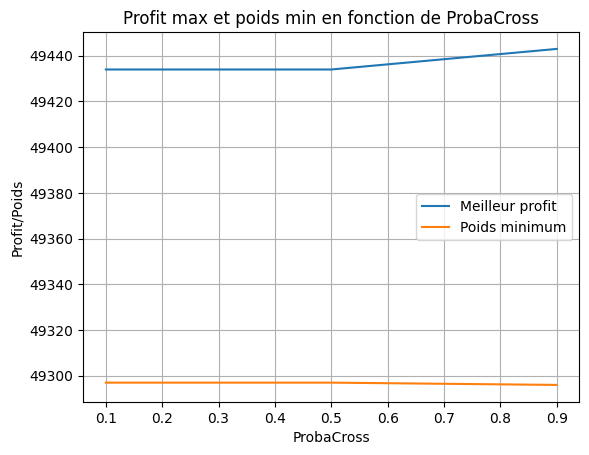

In [ ]:
y = probaCross_list
y1 = [max_profits_probaCross[i] for i in y]
y2 = [min_weights_probaCross[i] for i in y]

plt.plot(y, y1, label='Meilleur profit')
plt.plot(y, y2, label='Poids minimum')
plt.xlabel('ProbaCross')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de ProbaCross')
plt.legend()
plt.grid()
plt.show()

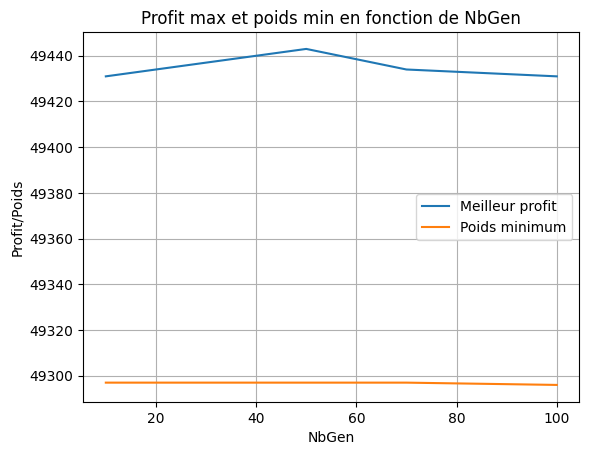

In [ ]:
z = nbGen_list
z1 = [max_profits_nbGen[i] for i in z]
z2 = [min_weights_nbGen[i] for i in z]

plt.plot(z, z1, label='Meilleur profit')
plt.plot(z, z2, label='Poids minimum')
plt.xlabel('NbGen')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de NbGen')
plt.legend()
plt.grid()
plt.show()

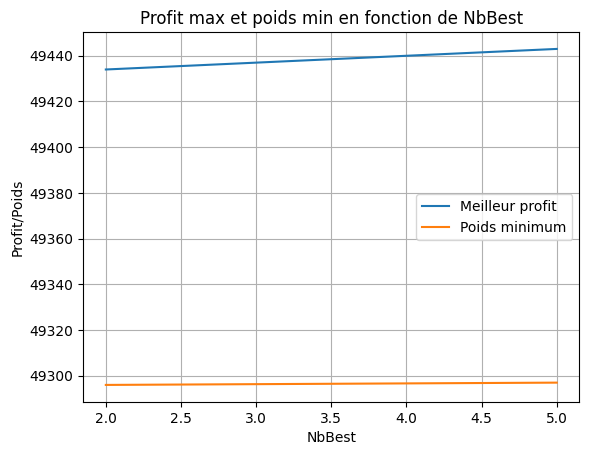

In [ ]:
k = nbBest_list
k1 = [max_profits_nbBest[i] for i in k]
k2 = [min_weights_nbBest[i] for i in k]

plt.plot(k, k1, label='Meilleur profit')
plt.plot(k, k2, label='Poids minimum')
plt.xlabel('NbBest')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de NbBest')
plt.legend()
plt.grid()
plt.show()

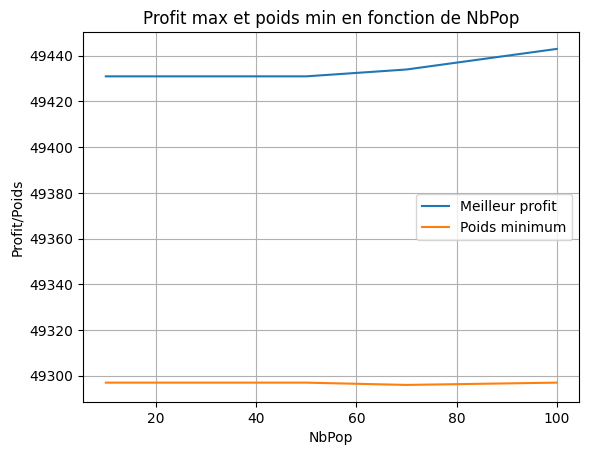

In [ ]:
x = nbPop_list
x1 = [max_profits_nbPop[i] for i in x]
x2 = [min_weights_nbPop[i] for i in x]

plt.plot(x, x1, label='Meilleur profit')
plt.plot(x, x2, label='Poids minimum')
plt.xlabel('NbPop')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de NbPop')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def find_optimal_solution(nbPop_list, nbGen_list, probaCross_list, nbBest_list, optimal_solution):

    filenames = []
    for nbPop in nbPop_list:
        for nbGen in nbGen_list:
          for probaCross in probaCross_list:
            for nbBest in nbBest_list:
                filename = f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000_15.csv"
                if os.path.exists(filename):
                    try:
                        df = pd.read_csv(filename)
                        if optimal_solution in df["Nouvelle solution"].values:
                            filenames.append(filename)
                    except pd.errors.ParserError:
                        print(f"Warning: Could not parse file {filename}. Skipping.")
                else:
                    print(f"Fichier manquant: {filename}")

    return filenames


In [ ]:
def find_files_with_profit_and_weight(target_profit, target_weight, dossier="Resultats"):
    filenames = []

    for filename in os.listdir(dossier):
        if filename.startswith("NbPop") and filename.endswith(".csv"):
            filepath = os.path.join(dossier, filename)
            try:
                df = pd.read_csv(filepath)

                if 'Nouveau profit' in df.columns and 'Nouveau Poids' in df.columns:
                    condition = (df['Nouveau profit'] == target_profit) & (df['Nouveau Poids'] == target_weight)
                    if any(condition):
                        filenames.append(filename)
            except Exception as e:
                print(f"Erreur avec le fichier {filename}: {e}")

    return filenames


In [ ]:
fichier_optimal = find_optimal_solution(nbPop_list, nbGen_list, probaCross_list, nbBest_list, best_solution_str)
for f in fichier_optimal:
  print(f) #aucun fichier contient la solution optimale en termes de choix d'objets

A executer uniquement si le resultat precedent n'est pas nul

In [ ]:
print(target_profit)
target_profit = 50622
print(target_weight)
found_files = find_files_with_profit_and_weight(target_profit, target_weight)
for f in found_files:
  print(f)

50621.99999999997
49297


In [ ]:
def analyze_files(found_files):
    nbPop_counts = {}
    nbGen_counts = {}
    probaCross_counts = {}
    nbBest_counts = {}

    for file in found_files:
      try:
          df = pd.read_csv(file)

          parts = file.split("_")

          pop_str = parts[0].split("NbPop")[1]
          nbPop_counts[int(pop_str)] = nbPop_counts.get(int(pop_str), 0) + 1

          gen_str = parts[1].split("NbGen")[1]
          nbGen_counts[int(gen_str)] = nbGen_counts.get(int(gen_str), 0) + 1

          probaCross_str = parts[2].split("ProbaCross")[1]
          probaCross_counts[float(probaCross_str)] = probaCross_counts.get(float(probaCross_str), 0) + 1

          best_str = parts[3].split("NbBest")[1]
          nbBest_counts[int(best_str)] = nbBest_counts.get(int(best_str), 0) + 1
      except pd.errors.ParserError:
          print(f"Fichier {file} non retrouve.")

    return nbPop_counts, nbGen_counts, probaCross_counts, nbBest_counts

In [ ]:
nbPop_dict, nbGen_dict, probaCross_dict, nbBest_dict = analyze_files(found_files)
print(nbPop_dict)
print(nbGen_dict)
print(probaCross_dict)
print(nbBest_dict)

max_nbPop = max(nbPop_dict, key=nbPop_dict.get)
print("Le nombre de population optimal est:", max_nbPop)
max_nbGen = max(nbGen_dict, key=nbGen_dict.get)
print("Le nombre de génération optimal est:", max_nbGen)
max_probaCross = max(probaCross_dict, key=probaCross_dict.get)
print("La probabilité de croisement optimale est:", max_probaCross)
max_nbBest = max(nbBest_dict, key=nbBest_dict.get)
print("Le nombre de meilleures solutions optimal est:", max_nbBest)

{20: 108, 5: 107, 70: 108, 10: 108, 50: 108, 100: 108}
{100: 108, 10: 108, 70: 108, 5: 107, 20: 108, 50: 108}
{0.2: 72, 0.3: 72, 0.7: 72, 0.4: 72, 0.5: 72, 0.9: 72, 0.6: 72, 0.8: 72, 0.1: 71}
{2: 323, 5: 324}
Le nombre de population optimal est: 20
Le nombre de génération optimal est: 100
La probabilité de croisement optimale est: 0.2
Le nombre de meilleures solutions optimal est: 5


## Temps

In [228]:
import glob
import pandas as pd
import os

n_values=[100, 1000, 10000]

def calculer_moyenne_temps_par_n_recuit(n_values):
    # Dictionnaire pour stocker les moyennes pour chaque n
    moyennes_temps = {}

    # Parcourir les valeurs de n (100, 1000, 10000)
    for n in n_values:
        temps_list = []

        file_name = f"Resultats/*resultats_recuit_simule{n}_15.csv"

        # Trouver tous les fichiers correspondant au pattern
        for file in glob.glob(file_name):
                try:
                    df = pd.read_csv(file)
                    # Si la colonne 'Temps (s)' existe dans le fichier
                    if 'Temps (s)' in df.columns:
                        temps_list.append(df['Temps (s)'].mean())
                    else:
                        print(f"La colonne 'Temps (s)' est absente dans {file}.")
                except Exception as e:
                    print(f"Erreur lors de la lecture du fichier {file}: {e}")

        # Calcul de la moyenne pour chaque n
        if temps_list:
            moyennes_temps[n] = sum(temps_list) / len(temps_list)
        else:
            moyennes_temps[n] = None

    return moyennes_temps

moyennes_recuit = calculer_moyenne_temps_par_n_recuit(n_values)
temps_meta_recuit = list(moyennes_recuit.values())
print(f"Moyennes des temps pour chaque n: {temps_meta_recuit}")
print(f"Moyenne des temps avec le solver: {temps_solver}")

Moyennes des temps pour chaque n: [np.float64(0.7528384138036657), np.float64(1.3610868824852838), np.float64(18.995672884693853)]
Moyenne des temps avec le solver: [0.010524988174438477, 0.03899645805358887, 3.514584541320801]


In [229]:
import glob
import pandas as pd
import os

n_values=[100, 1000, 10000]

def calculer_moyenne_temps_par_n_gen(n_values):
    # Dictionnaire pour stocker les moyennes pour chaque n
    moyennes_temps = {}

    # Parcourir les valeurs de n (100, 1000, 10000)
    for n in n_values:
        temps_list = []

        file_name = f"Resultats/*_resultats_algo_genetique{n}_15.csv"

        # Trouver tous les fichiers correspondant au pattern
        for file in glob.glob(file_name):
                try:
                    df = pd.read_csv(file)
                    # Si la colonne 'Temps (s)' existe dans le fichier
                    if 'Temps (s)' in df.columns:
                        temps_list.append(df['Temps (s)'].mean())
                    else:
                        print(f"La colonne 'Temps (s)' est absente dans {file}.")
                except Exception as e:
                    print(f"Erreur lors de la lecture du fichier {file}: {e}")

        # Calcul de la moyenne pour chaque n
        if temps_list:
            moyennes_temps[n] = sum(temps_list) / len(temps_list)
        else:
            moyennes_temps[n] = None

    return moyennes_temps

moyennes_gen = calculer_moyenne_temps_par_n_gen(n_values)
temps_meta_gen = list(moyennes_gen.values())
print(f"Moyennes des temps pour chaque n - recuit simule - pi12: {temps_meta_recuit}")
print(f"Moyennes des temps pour chaque n - algo genetique - pi12: {temps_meta_gen}")
print(f"Moyenne des temps avec le solver: {temps_solver}")

Moyennes des temps pour chaque n - recuit simule - pi12: [np.float64(0.7528384138036657), np.float64(1.3610868824852838), np.float64(18.995672884693853)]
Moyennes des temps pour chaque n - algo genetique - pi12: [np.float64(2.103264351685842), np.float64(16.212007614473503), np.float64(153.6779187321663)]
Moyenne des temps avec le solver: [0.010524988174438477, 0.03899645805358887, 3.514584541320801]


In [226]:
!pip install -q scipy

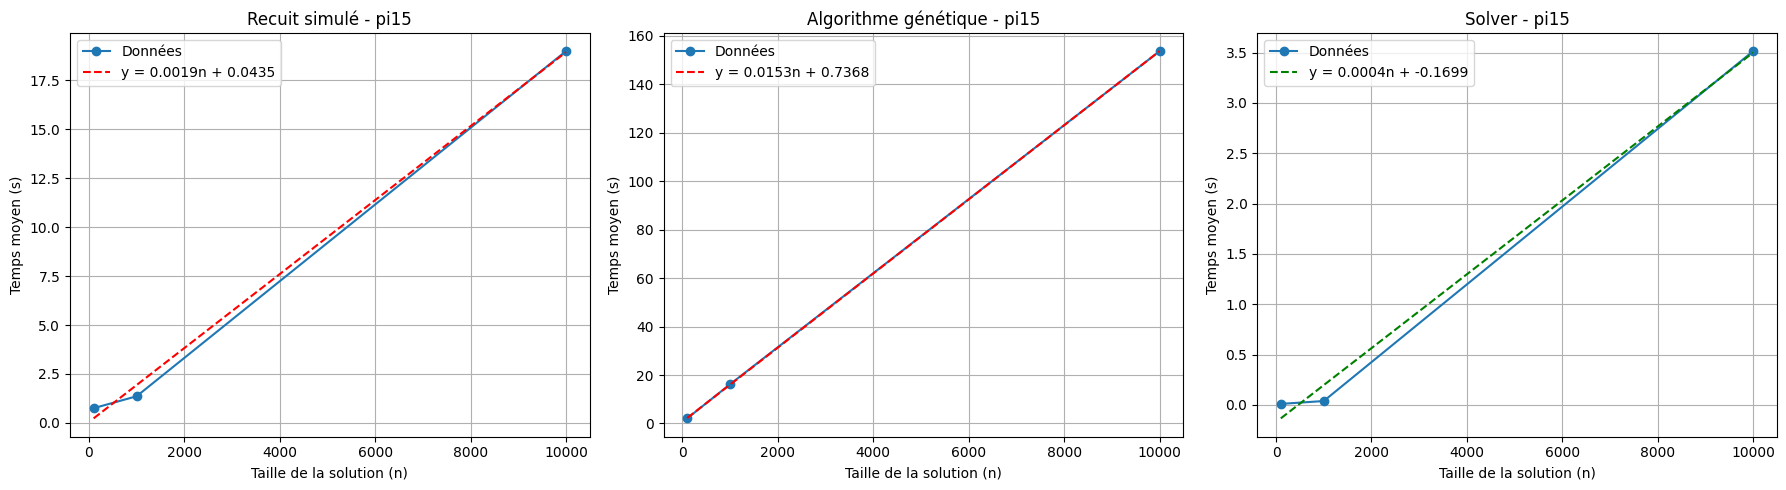

In [227]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Régression linéaire pour recuit simulé
slope_meta1, intercept_meta1, _, _, _ = linregress(n_values, temps_meta_recuit)
line_meta1 = [slope_meta1 * n + intercept_meta1 for n in n_values]
eq_meta1 = f"y = {slope_meta1:.4f}n + {intercept_meta1:.4f}"

# Régression linéaire pour algo génétique
slope_meta2, intercept_meta2, _, _, _ = linregress(n_values, temps_meta_gen)
line_meta2 = [slope_meta2 * n + intercept_meta2 for n in n_values]
eq_meta2 = f"y = {slope_meta2:.4f}n + {intercept_meta2:.4f}"

# Régression linéaire pour solver
slope_solver, intercept_solver, _, _, _ = linregress(n_values, temps_solver)
line_solver = [slope_solver * n + intercept_solver for n in n_values]
eq_solver = f"y = {slope_solver:.4f}n + {intercept_solver:.4f}"

# Création des subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Subplot 1 : Recuit simulé
axs[0].plot(n_values, temps_meta_recuit, 'o-', label="Données")
axs[0].plot(n_values, line_meta1, 'r--', label=eq_meta1)
axs[0].set_title("Recuit simulé - pi15")
axs[0].set_xlabel("Taille de la solution (n)")
axs[0].set_ylabel("Temps moyen (s)")
axs[0].legend()
axs[0].grid()

# Subplot 2 : Algorithme génétique
axs[1].plot(n_values, temps_meta_gen, 'o-', label="Données")
axs[1].plot(n_values, line_meta2, 'r--', label=eq_meta2)
axs[1].set_title("Algorithme génétique - pi15")
axs[1].set_xlabel("Taille de la solution (n)")
axs[1].set_ylabel("Temps moyen (s)")
axs[1].legend()
axs[1].grid()

# Subplot 3 : Solver
axs[2].plot(n_values, temps_solver, 'o-', label="Données")
axs[2].plot(n_values, line_solver, 'g--', label=eq_solver)
axs[2].set_title("Solver - pi15")
axs[2].set_xlabel("Taille de la solution (n)")
axs[2].set_ylabel("Temps moyen (s)")
axs[2].legend()
axs[2].grid()

plt.tight_layout()
plt.show()
